<a href="https://colab.research.google.com/github/hopesowle/Sowle_BIX_F23/blob/main/Static_and_Shifting_Path_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Can you adapt to changing environments?
By: William Rabon, Virginia Yost, Hope Sowle, Olga Mavridis, and Ali Shively

Here we will explore how different agents:
  
  **1. Follow a trail of targets to obtain rewards**

  **2. Adapt to changing environments**


# **Background and Problem**
It's that time of the week again—your trip to the grocery store! Prepared with a list of items, you navigate through the store, seeking out everything you need. What you may not notice is that your actions mirror the concept of foraging, albeit in a modern context.
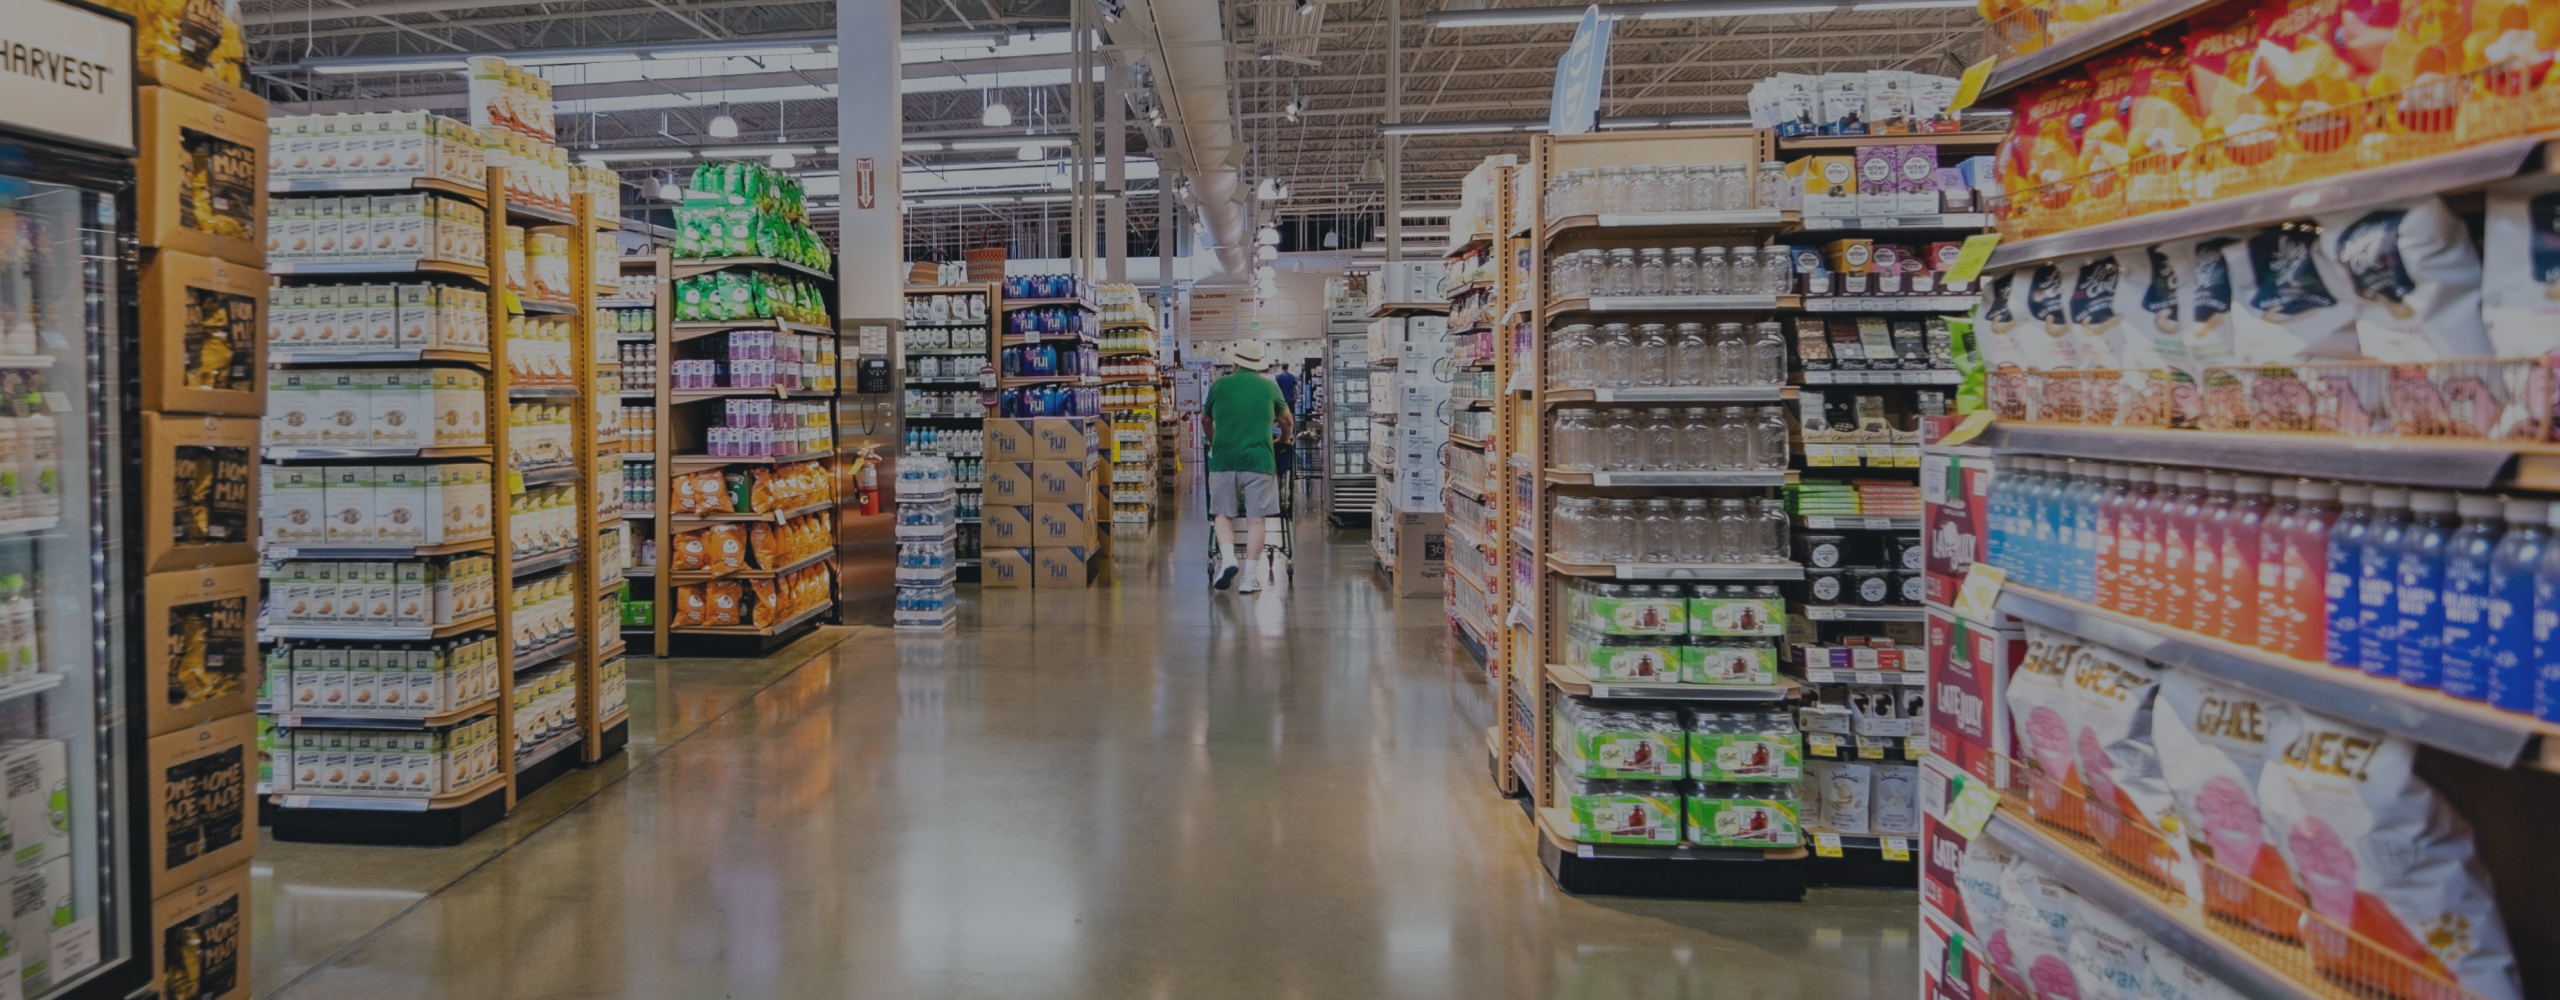


For virtually all organisms, foraging, which encompasses the search for food and resources, stands as a crucial element for survival. The ability of an organism to move to explore the environment significantly impacts the organism's success at finding food. Yet, the energy expended during movement requires a strategic approach to exploration, aiming to maximize gained rewards while minimizing energy expenditure.

$$$$

Throughout the semester we have explored various agents navigating environments where targets were either randomly distributed or arranged in randomly scattered patches. However, real-world food distribution often adheres to specific patterns, such as finding eggs near the milk in a grocery store. In addition to patterned distribution, natural settings can undergo sudden changes without warning, like the store manager rearranging the store layout. To address this realistic complexity, our project aims to delve into how different agents perform within defined static and dynamically changing environments.

$$$$

Building on our findings from several labs, we know distinct strategies excel in certain environments. The ideal exploration approach for an organism depends on both the environmental layout and the organism's complexity. Understanding these critical factors is pivotal in determining how different agents navigate and adapt within diverse environments.

#**What is foraging and optimal foraging theory** [1]?

**Foraging** is the way an organism acquires and uses energy and nutrients with the goal of having more energy gained than energy spent. It is crucial organisms adapt their foraging strategies based on their environment and capabilities.

$$$$**Optimal Foraging Theory** is the most effective strategy employed by an animal to enhance fitness, optimizing energy gain while minimizing energy expenditure. This is achieved by leveraging knowledge of resource availability, competition, and the risk of predation. This behavior is commonly observed in various organisms during their foraging activities.

#Examples of Foraging

* The **honeybees** foraging strategy is related to its wingwear, demonstrating a high proportion of nectar robbing with extensively damaged wings [2].

* During the hunting season, **Scandinavian brown bears** reduce their foraging activity at the expense of food intake in the morning hours to avoid risk of predation [3].

* Utilizing our evolutionary advancements, **humans** manipulated the environment for survival [4]. Prior to embracing agricultural practices, our survival depended on scavenging animal remains left by predators. This changed when we transitioned to establishing permanent settlements, enabling the support of larger populations. Presently, food foraging demands significantly less energy for many, as most opt for a visit to local grocery stores.

$$$$

Now, let's delve deeper into our definition of environments and agents in this context.


#**Environments**

To replicate this scenario, we established three distinct environments for our agents.

1. **Random**:The initial environment serves as a baseline—a random setup where reward signals are dispersed randomly across the environment, devoid of any correlation or discernible pattern. This randomness emulates real-world conditions where the agent must extensively explore to discover rewards or signals. Here, the absence of correlation between signals demands that the agent learns the environment and locates the signals independently.
While this analogy might diverge from direct real-world implications, you can imagine a similar scenario to wandering through a grocery store where items are placed randomly on shelves, or in the case where you are looking for a very specific item you have never bought before.

2. **Static Environment**: The subsequent environment stands as an antithesis to the random environment—a static path environment. Much like a maze, this environment features a continuous, unobstructed trail of reward signals following a specific pattern for our agents to navigate. However, unlike traditional mazes with physical barriers, this scenario provides the agents with increased freedom in their movement as they explore, given the absence of obstacles. Here, learning the sequence of this designated path becomes crucial. Predicting the next signal's location based on the sequence of previous signals enhances the agent's efficiency in traversing the maze. This environment parallels the experience of navigating a grocery store with a predefined path to each item on your shopping list. Imagine strolling through the store aisles, where each product location follows a predictable sequence akin to knowing the exact order of your items on the shelves, streamlining your shopping process.

3. **Dynamic Environment**: The third environment introduces a dynamic change midway through the iteration process. Similar to the bandit task's shift in the most rewarding arm at a specific time step, in this environment, the location of the patterned targets' patch undergoes a change. This presents a unique challenge compared to the previous conditions. While the static environment aimed to assess an agent's ability to successfully follow a fixed trail, this dynamically changing path aims to evaluate which agent exhibits the highest adaptability in altering its understanding of the environment and effectively learning from those changes. To draw a final comparison, imagine entering a familiar grocery store where the product placement pattern remains consistent, but the layout of the aisles has completely changed. This alteration prompts you to readjust your navigation strategy as you search for items in different areas due to the rearranged aisle structure.

#**Agents**

Our aim is to position four different agents within each of the environments defined above to determine the most effective foraging strategy for an organism.

The four agents are defined as follows:


1. **Random Agent**: Employs random Brownian motion search, where, at each movement step, both the direction and distance of movement are randomly chosen. The distance of movement ($\delta_i$) at each time step ($i$) is sampled from a random distribution as follows:



   $$\delta_i = {u_i}^{-\frac{1}{\gamma}}, \text{where }  u_i \sim N(\mu,\sigma) \text{  and  } \gamma > 1. $$

2. **Chemotaxis Agent**: Tries to estimate the gradient of the scent $\nabla$  by comparing the level of scent at the last grid position it occupied to the current scent level ($o$). When the scent gradient is positive the probability of turning is p pos. When the scent gradient is negative the probabiility of turning is set to p neg. If the agent turns, the direciotn is uniform random.

$$\nabla \approx o_t - o_{t-1}$$

3. **Infotaxis Agent**: Assesses the quantity of information contained within the scent signal to aid in decision-making. These agents employ a cognitive/behavioral process encompassing the following five steps:

    1. Use an accumulator to (stabely) estimate if there is a scent or not. AKA hits and misses.
    2. Build a probability model of hits/misses (at every point)
    3. Measure information gained when probability model changes
    4. Measure the gradient of information gains
    5. Use the gradient to make turning decisions

4. **RL Agent**: Learns to value each position on the grid and make its immediate choices based on the value of the possible actions that it can make. The RL agent operates without a shaping function or intrinsic reward. It does not rely on scent cues, essentially disregarding them. Instead, this agent learns to assign value to every position on the grid and determines its immediate actions based on the assessed value of the four possible directions (up, down, left, right).
   
   * $Q \leftarrow Q + \alpha * (R - Q)$

   * $Q$: the reward value trying to approximate the average reward value of each arm

   * $R$: the reward
    
   * Learning rate on the reward prediction error ($R-Q$) is denoted as $\alpha$, so that the equation above looks nice. Learning rate is parameter that controls how much each value update matters. It should be noted that ($R-Q$) is the error signal used for learning in RL.


#**Assessment of Performance**

**Total Reward**
The total number of resources obtained by the agent in each simulation will assist us in evaluating their ability to locate and follow signals. A high total reward indicates that the agent successfully found and acquired numerous resources, while a low total reward suggests potential difficulties in locating multiple resources, possibly finding only one. In essence, a low total reward implies that the agent encountered challenges in following a consistent path.

**Proportion of time spent on patches/resources**
This information will provide insights into the efficiency of each agent in tracking resources. It addresses whether they dedicated considerable time to searching or focused more on following and acquiring resources. A high proportion of time spent on patches indicates that the agent consistently remained on resource-rich areas without exploring the environment, while a low proportion suggests that the agent devoted more time to surveying and exploring the environment rather than staying on the resources.


**Deaths**
The frequency of deaths for each agent will indicate their proficiency in consistently locating resources. A high number of deaths suggests that the agent struggled to find resources, while a low number indicates that the agent was adept at consistently locating the resources.
Each of the agents we are using are defined below.





# **Hypotheses**

Each of the agents mentioned interacts uniquely with its environment, potentially showcasing strengths across the range of environments under examination. However, among these agents, specific distinctions exist:

* The **RL agent** doesn't rely on scent but focuses solely on valuing positions within the grid.
* The **Infotaxis agent** uniquely updates its probability distribution considering both the presence and absence of scents in a trail, potentially providing an advantage in locating rewards.
* The **Chemotaxis** agent utilizes a positive scent gradient to navigate probabilistically but only updates its model in the presence of a scent or resource.
* The **Random agent** moves irrespective of encountering a resource.

From what we know about the exploratory natures of each agent, our hypotheses are as follows:
1. We predict that the **RL agent** will perform the best across our environments, demonstrated by the highest reward, most time spent on patches, and least deaths.
2.  We also predict that the **Random agent** will perform the worst across our static and dynamic environments, with the lowest reward, least time spent on patches, but with less deaths than the Chemotaxis and Infotaxis Agents. However, we think this agent will outperform the Infotaxis and Chemotaxis Agents in the baseline, random environment.

## Section - Setup

# **Set-up**
Install libraries and import agents/environments

Change the directory to where we want to clone in the specific explorationlib code library branch.

In [ ]:
cd /content

/content


Clone in the `target-patch-dev` explorationlib branch (the branch that has our new patchy environment functions).

In [ ]:
!git clone -b target-patch-dev https://github.com/coaxlab/explorationlib

Cloning into 'explorationlib'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (273/273), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 769 (delta 266), reused 241 (delta 241), pack-reused 496
Receiving objects: 100% (769/769), 16.62 MiB | 18.91 MiB/s, done.
Resolving deltas: 100% (467/467), done.


Change the working directory to the cloned library, so that we can load modules from it later on.

In [ ]:
cd /content/explorationlib

/content/explorationlib


Install some other supporting code libraries, like gym-maze, which some explorationlib simulated environment code relies on.

In [ ]:
# Install explorationlib
!pip install --upgrade git+https://github.com/coaxlab/explorationlib
!pip install --upgrade git+https://github.com/parenthetical-e/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git
!pip install celluloid # for the gifs

  Cloning https://github.com/coaxlab/explorationlib to /tmp/pip-req-build-h6i826_e
  Running command git clone --filter=blob:none --quiet https://github.com/coaxlab/explorationlib /tmp/pip-req-build-h6i826_e
  Resolved https://github.com/coaxlab/explorationlib to commit 51e93ea9a3866d32202fb912bc46f7fcb18e8a17
  Preparing metadata (setup.py) ... done
  Created wheel for explorationlib: filename=explorationlib-0.0.1-py3-none-any.whl size=41444 sha256=303801def25d7097d53beb859417ce26c56f91991b08308031c5667464702e30
  Stored in directory: /tmp/pip-ephem-wheel-cache-mit4ribq/wheels/71/57/e8/88c93e85ce02efaef024038b2ddcb6c6dec8a1a212f712bb05
Successfully built explorationlib
  Cloning https://github.com/parenthetical-e/explorationlib to /tmp/pip-req-build-9ec4xlgy
  Running command git clone --filter=blob:none --quiet https://github.com/parenthetical-e/explorationlib /tmp/pip-req-build-9ec4xlgy
  Resolved https://github.com/parenthetical-e/explorationlib to commit 51e93ea9a3866d32202fb912bc

Import specific modules from the libraries we loaded. We'll use these modules to create and plot enviornments, run experiments with different exploration agents in these environments, visualize their behaviors, and evaluate their performance according to various metrics.

In [ ]:
import shutil
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

import explorationlib
from explorationlib.local_gym import ScentGrid

from explorationlib.agent import WSLSGrid
from explorationlib.agent import CriticGrid
from explorationlib.agent import SoftmaxActor
from explorationlib.agent import DiffusionGrid
from explorationlib.agent import GradientDiffusionGrid
from explorationlib.agent import AccumulatorGradientGrid
from explorationlib.agent import AccumulatorInfoGrid
from explorationlib.agent import ActorCriticGrid
from explorationlib.agent import DiffusionDiscrete
from explorationlib.agent import GradientDiffusionDiscrete
from explorationlib.agent import AccumulatorGradientDiscrete

from explorationlib.run import experiment
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

from explorationlib.local_gym import uniform_targets
from explorationlib.local_gym import uniform_patch_targets
from explorationlib.local_gym import constant_values
from explorationlib.local_gym import ScentGrid
from explorationlib.local_gym import create_grid_scent
from explorationlib.local_gym import ScentMazeEnv
from explorationlib.local_gym import create_maze_scent
from explorationlib.local_gym import add_noise
from explorationlib.local_gym import create_grid_scent_patches

from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import plot_scent_grid
from explorationlib.plot import plot_targets2d

from explorationlib import score
from explorationlib.score import total_reward
from explorationlib.score import search_efficiency
from explorationlib.score import first_reward
from explorationlib.score import num_death
from explorationlib.score import on_off_patch_time


In [ ]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Dev
%load_ext autoreload
%autoreload 2

#Section 1 - Random

To establish a performance baseline for each agent, this section illustrates the behavior of all four agents within a fixed ScentGrid environment. The noise level is set at 1 standard deviation with a p_scent of 0.5, and we conduct 100 experiments per agent.

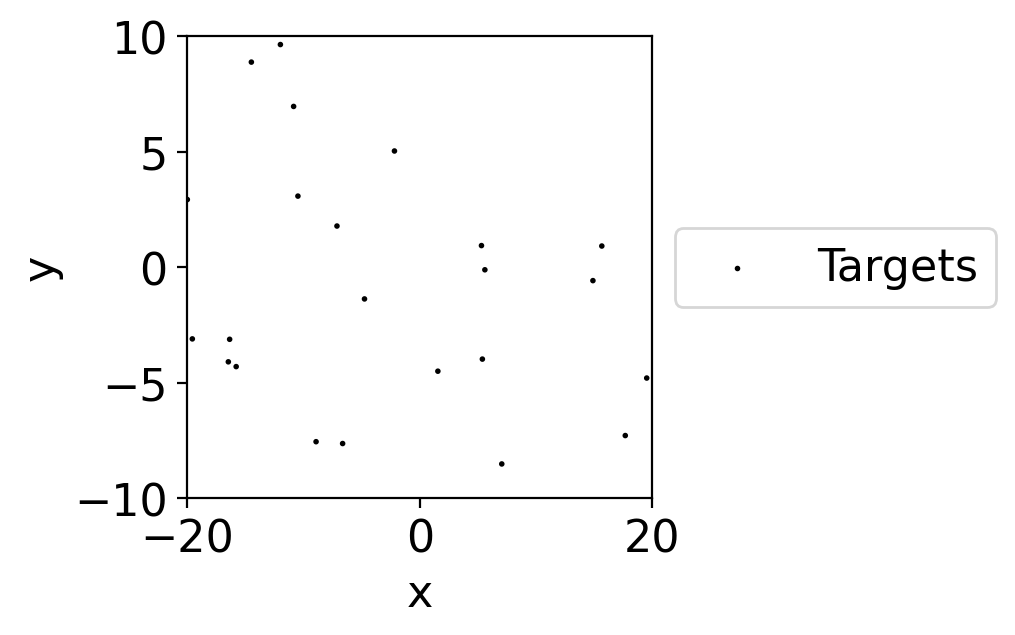

In [ ]:
# Noise and missing scents
p_scent = 0.5
noise_sigma = 1

# Shared
num_experiments = 100
num_steps = 400
seed_value = 5838

# ! (leave alone)
detection_radius = 1
cog_mult = 1
max_steps = 1
min_length = 1
num_targets = 50
target_boundary = (20, 20)

# Targets
prng = np.random.RandomState(seed_value)
targets = uniform_targets(num_targets, target_boundary, prng=prng)
values = constant_values(targets, 1)

# Scents
scents = []
for _ in range(len(targets)):
    coord, scent = create_grid_scent_patches(
        target_boundary, p=1.0, amplitude=1, sigma=2)
    scents.append(scent)

# Env
env = ScentGrid(mode=None)
env.seed(seed_value)
env.add_scents(targets, values, coord, scents, noise_sigma=noise_sigma)

#plot
plot_boundary = (20, 10)
num_experiment = 0
ax = None
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

rand:   0%|          | 0/100 [00:00<?, ?it/s]

chemo:   0%|          | 0/100 [00:00<?, ?it/s]

info:   0%|          | 0/100 [00:00<?, ?it/s]

rl:   0%|          | 0/100 [00:00<?, ?it/s]

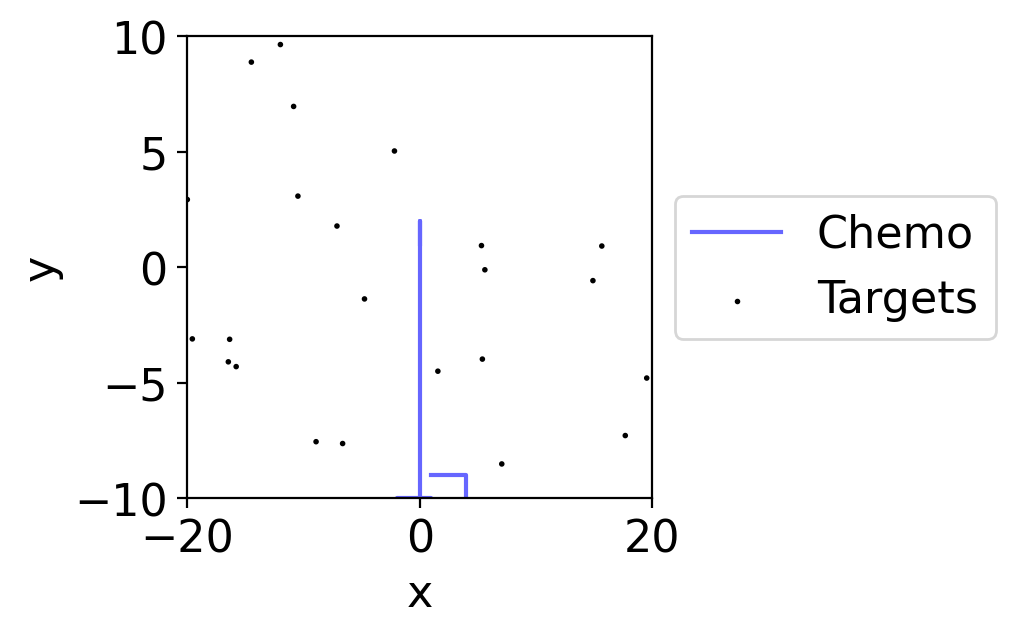

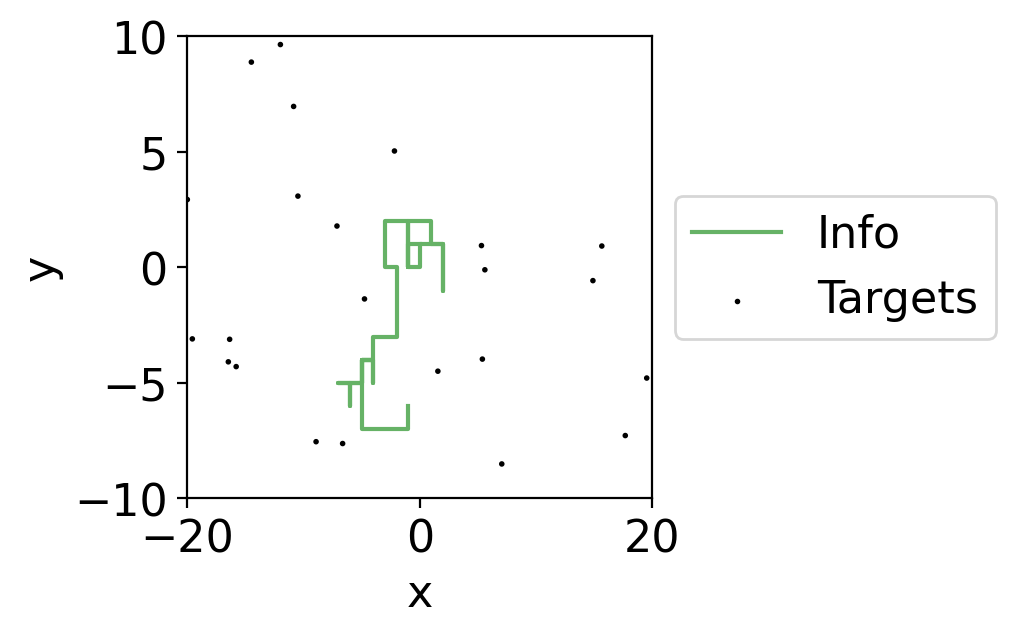

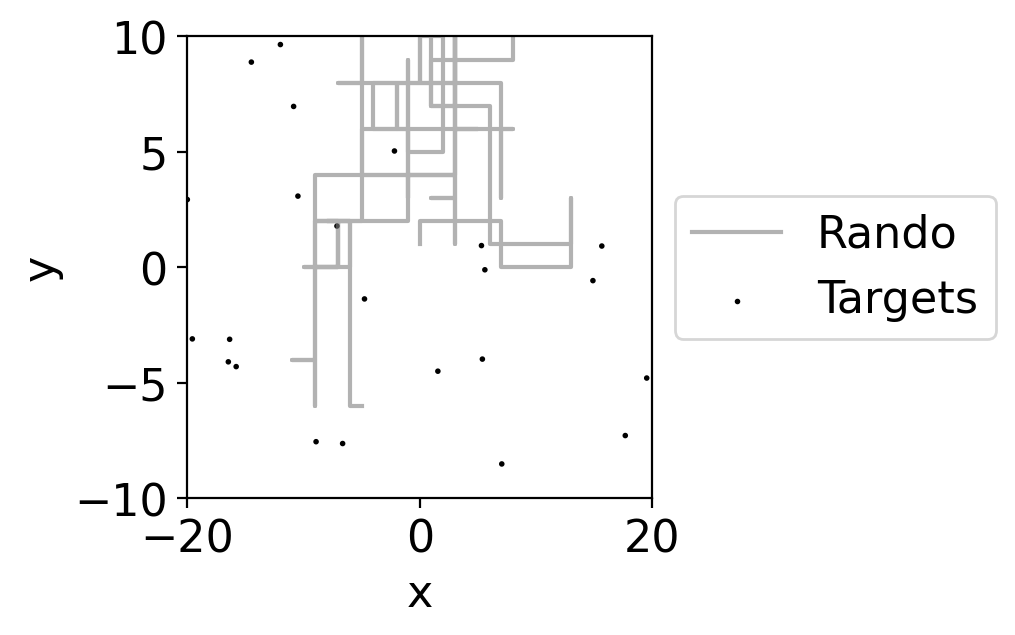

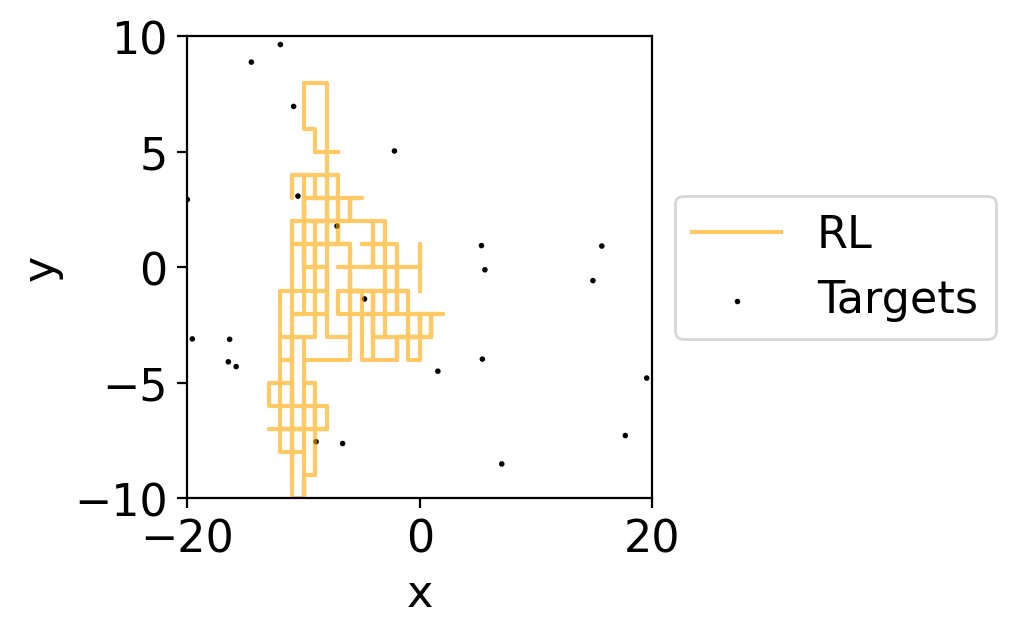

In [ ]:
#Agents
# RL
possible_actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
critic = CriticGrid(default_value=0.5)
actor = SoftmaxActor(num_actions=4, actions=possible_actions, beta=4)
rl = ActorCriticGrid(actor, critic, lr=0.1, gamma=0.1)

# Rando
diff = DiffusionGrid(min_length=min_length, scale=1)
diff.seed(seed_value)

# smart chemo
chemo = AccumulatorGradientGrid(
    min_length=min_length,
    max_steps=max_steps,
    drift_rate=1.5,
    threshold=3,
    accumulate_sigma=1
)
chemo.seed(seed_value)

# smart info
info = AccumulatorInfoGrid(
    min_length=min_length,
    max_steps=max_steps,
    drift_rate=1.5,
    threshold=3,
    accumulate_sigma=1
)
info.seed(seed_value)

# Experiments
rand_exp = experiment(
    f"rand",
    diff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

chemo_exp = experiment(
    f"chemo",
    chemo,
    env,
    num_steps=num_steps * cog_mult,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

info_exp = experiment(
    f"info",
    info,
    env,
    num_steps=num_steps * cog_mult,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

rl_exp = experiment(
    f"rl",
    rl,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

plot_boundary = (20,10)
num_experiment = 0

# Results
results = [chemo_exp, info_exp, rand_exp, rl_exp]
names = ["Chemo", "Info", "Rando", "RL"]
colors = ["blue", "green", "grey", "orange"]

for name, res, color in zip(names, results, colors):
    ax = None
    ax = plot_position2d(
        select_exp(res, num_experiment),
        boundary=plot_boundary, ## plot_boundary
        label=f"{name}",
        color=color,
        alpha=0.6,
        ax=ax,
    )
    ax = plot_targets2d(
        env,
        boundary=plot_boundary,
        color="black",
        alpha=1,
        label="Targets",
        ax=ax,
    )

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

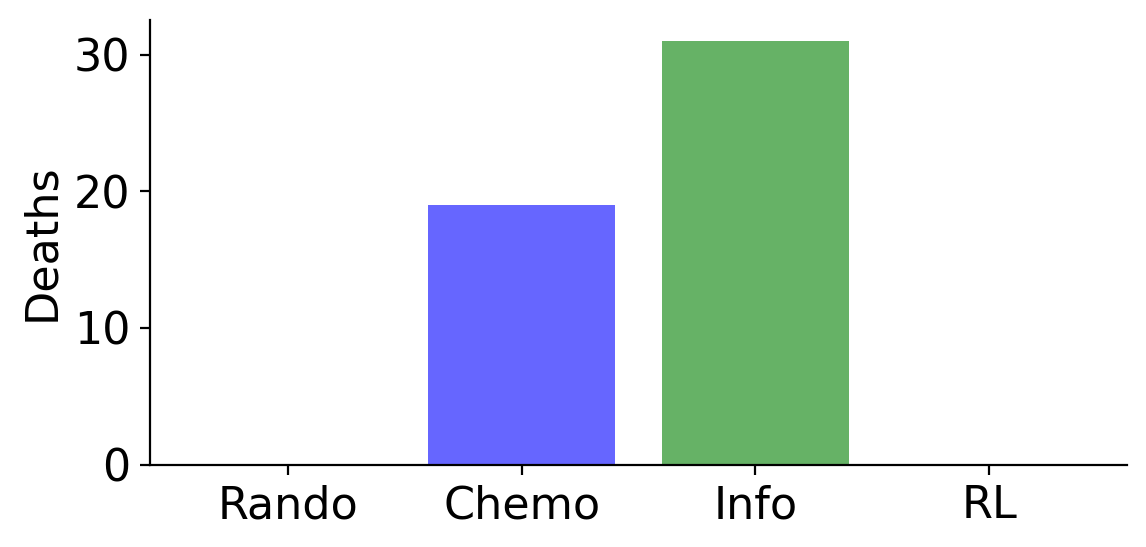

In [ ]:
# Results
results = [rand_exp, chemo_exp, info_exp,  rl_exp]
names = ["Rando", "Chemo", "Info",  "RL"]
colors = ["grey", "blue", "green", "orange"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    scores.append(num_death(res))

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(6, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Deaths")
plt.tight_layout()
sns.despine()

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

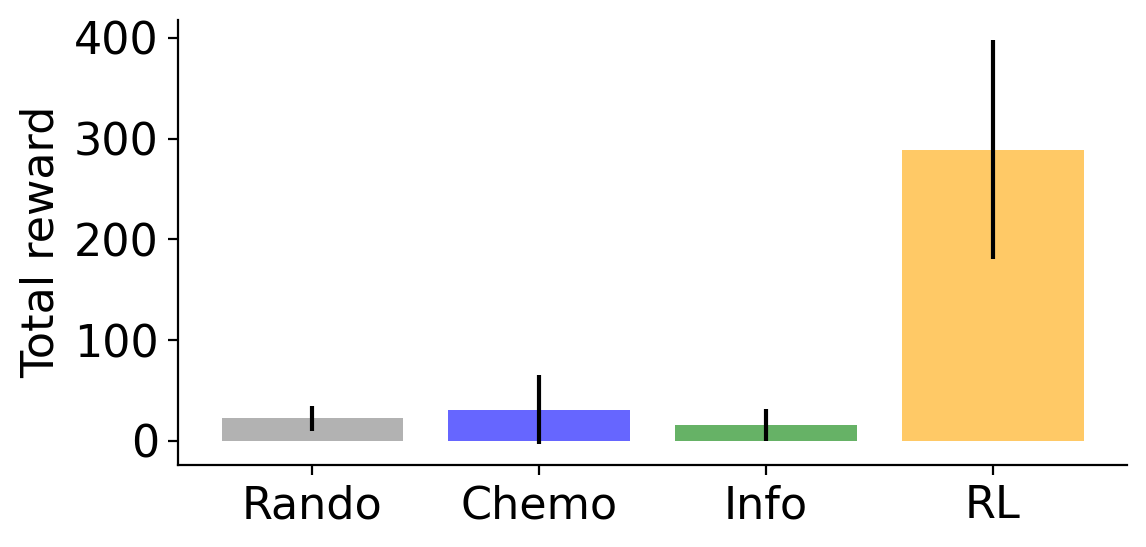

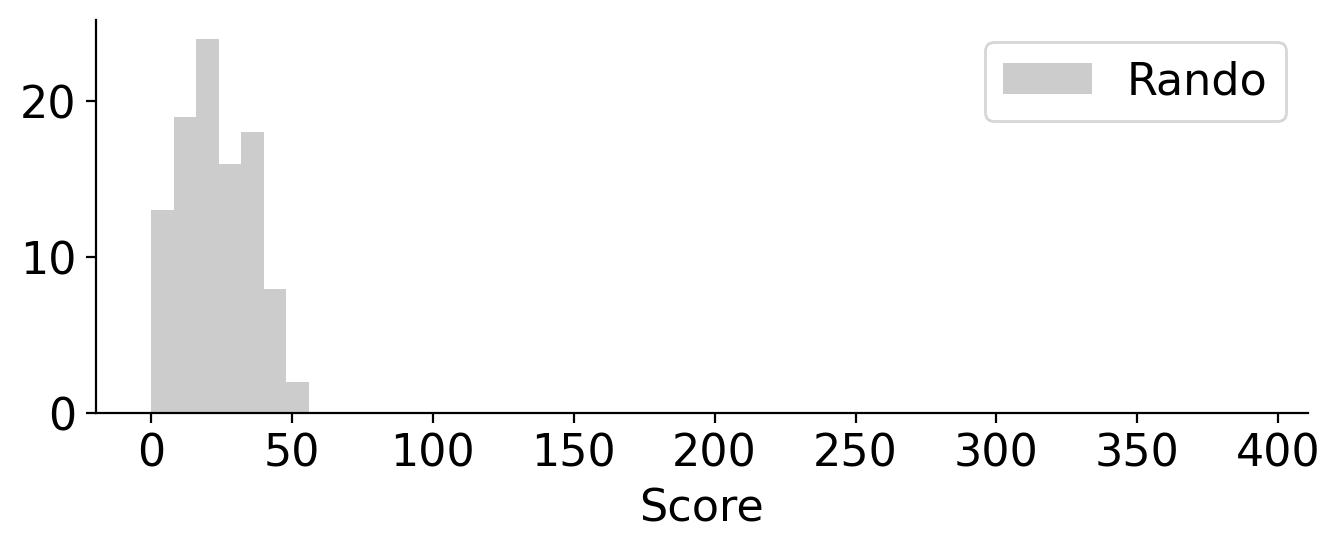

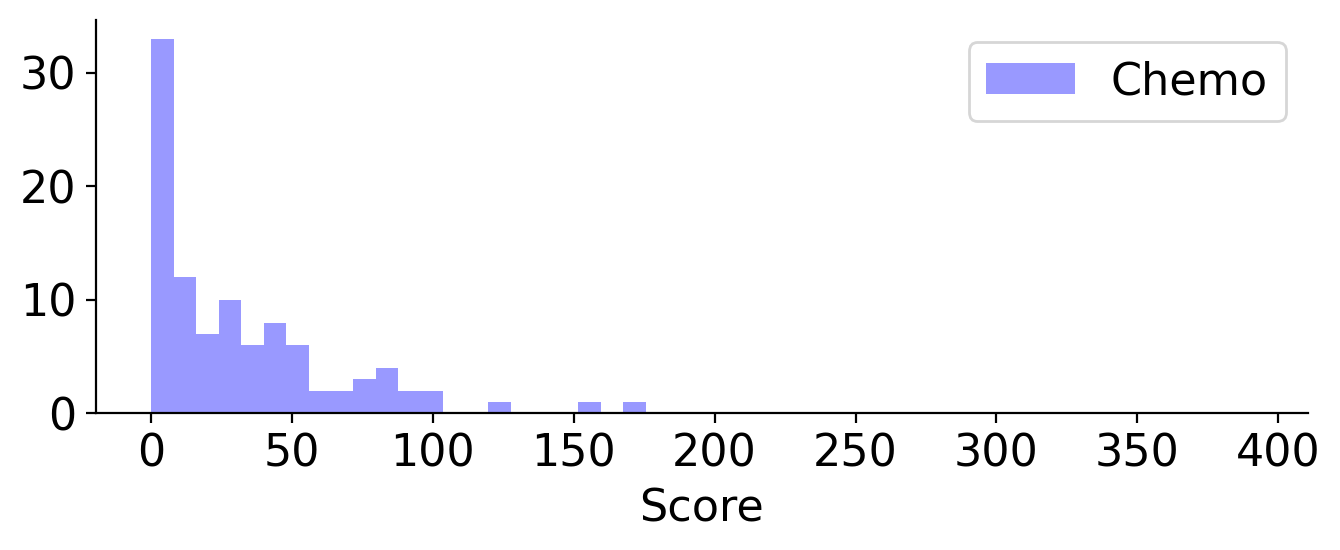

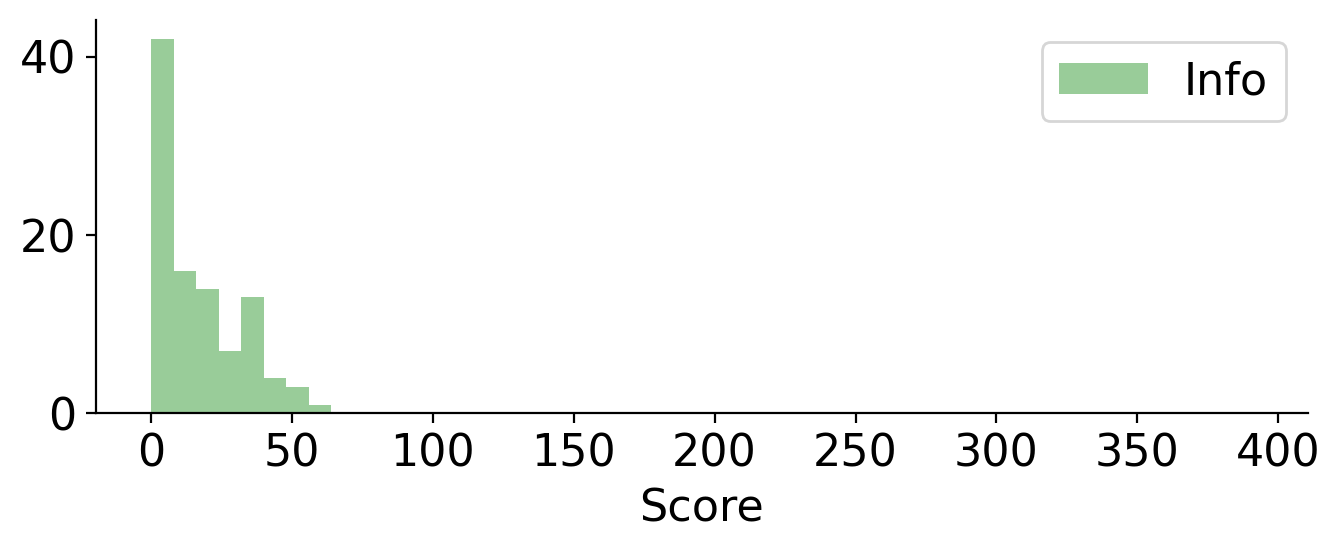

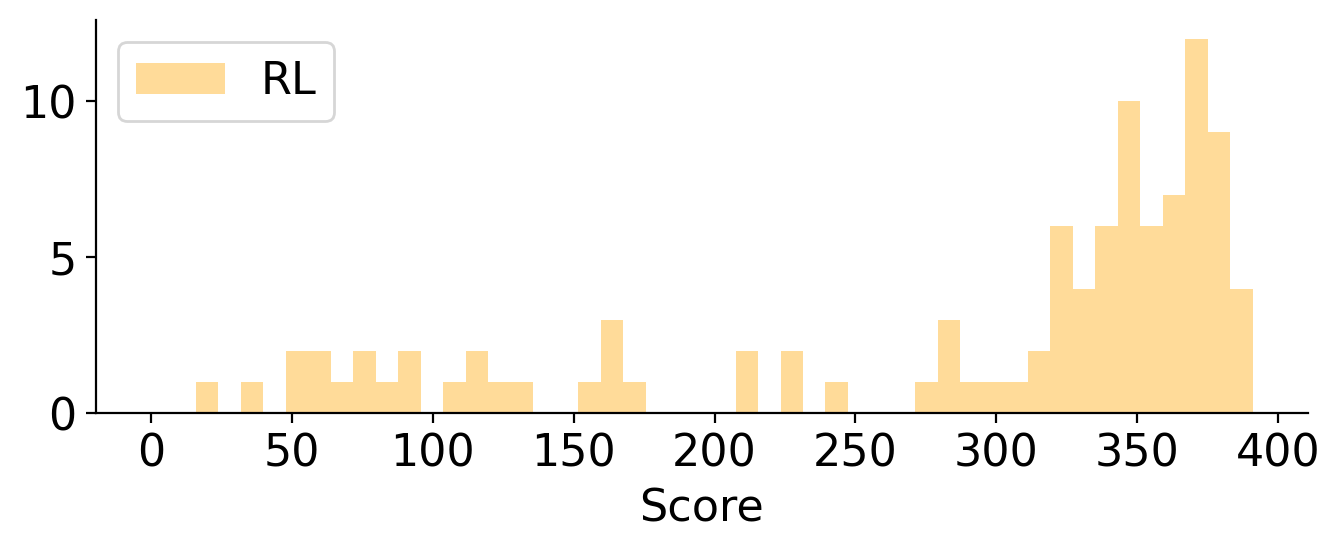

In [ ]:
# Results
results = [rand_exp, chemo_exp, info_exp,  rl_exp]
names = ["Rando", "Chemo", "Info","RL"]
colors = ["grey", "blue", "green", "orange"]

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(6, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Total reward")
plt.tight_layout()
sns.despine()

# Dists
# fig = plt.figure(figsize=(7, 5))
for (name, s, c) in zip(names, scores, colors):
    fig = plt.figure(figsize=(7, 3))
    plt.hist(s, label=name, color=c, alpha=0.4, bins=np.linspace(0, np.max(scores), 50))
    plt.legend()
    plt.xlabel("Score")
    plt.tight_layout()
    sns.despine()

## Random Results

Unsuprisingly, as we have demonstrated this in lab 10, our baseline results are as follows:
* The RL Agents exhibit the highest total reward and are associated with nearly zero deaths.
* The Chemotaxi Agents achieve the next highest total reward, although notably lower than that of RL Agents. Additionally, Chemo Agents have the second-highest number of deaths, totaling around 20.
* The Random Agents secure the third-highest total reward, on par with that of the Chemotaxis Agents, yet without any recorded deaths.
* The Infotaxis Agents appear to have performed the least favorably, exhibiting the lowest total reward and the most deaths.

In summary, these findings substantiate our hypotheses. The RL Agent's learning capacity contributes to its superior performance, contrasting with the known challenges faced by the Chemotaxis and Infotaxis agents in environments with dispersed, sparse targets. As a result, the Random Agent outperforms both the Chemotaxis and Infotaxis Agents due to its persistent exploration of the environment, unaffected by fixation on scent or information accumulation.

## Section 2 - Static Path Environment

Continuing in the fixed ScentGrid environment with noise_sigma = 1 and p_scent = 0.5, we proceed with another set of 100 experiments per agent. However, this time, we map specific target points in an M-shaped pattern to investigate each agent's capability to efficiently locate and navigate the target path with linear characteristics.



In [ ]:
# Noise and missing scents
p_scent = 0.5
noise_sigma = 1

# Shared
num_experiments = 100 #100
num_steps = 400
seed_value = 5838

# ! (leave alone)
detection_radius = 1
cog_mult = 1
max_steps = 1
min_length = 1
num_targets = 9
target_boundary = (10, 10)

# Environment parameters
detection_radius = 1
max_steps = 1
min_length = 1
n_patches = 7 #         # number of patches
n_per_patch = 10 #      # number targets per patch
radius = 2 #            # radius of each patch
target_boundary = (10, 10)

# Generate patches of argets
prng = np.random.RandomState(seed_value)
targets, patch_locs = uniform_patch_targets(n_patches, target_boundary, radius, n_per_patch, prng=prng)



#targets
firstPos = [1,1]
targets = []
targets.append(firstPos)
currPosX = firstPos[0]
currPosY = firstPos[1]
while currPosX < 5:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 5 <= currPosX < 10:
  newPosX = currPosX +1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 10 <= currPosX < 15:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 15 <= currPosX < 20:
  newPosX = currPosX + 1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)

# Scents
scents = []
for _ in range(len(targets)):
    coord, scent = create_grid_scent_patches(
        target_boundary, p=1.0, amplitude=1, sigma=2)
    scents.append(scent)

# Env
env = ScentGrid(mode=None)
env.seed(seed_value)
env.add_scents(targets, values, coord, scents, noise_sigma=noise_sigma)


In [ ]:
#Agents
# RL
possible_actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
critic = CriticGrid(default_value=0.5)
actor = SoftmaxActor(num_actions=4, actions=possible_actions, beta=4)
rl = ActorCriticGrid(actor, critic, lr=0.1, gamma=0.1)

# Rando
diff = DiffusionGrid(min_length=min_length, scale=1)
diff.seed(seed_value)

# smart chemo
chemo = AccumulatorGradientGrid(
    min_length=min_length,
    max_steps=max_steps,
    drift_rate=1.5,
    threshold=3,
    accumulate_sigma=1
)
chemo.seed(seed_value)

# smart info
info = AccumulatorInfoGrid(
    min_length=min_length,
    max_steps=max_steps,
    drift_rate=1.5,
    threshold=3,
    accumulate_sigma=1
)
info.seed(seed_value)

#-----

# Experiments
rand_exp = experiment(
    f"rand",
    diff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

chemo_exp = experiment(
    f"chemo",
    chemo,
    env,
    num_steps=num_steps * cog_mult,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

info_exp = experiment(
    f"info",
    info,
    env,
    num_steps=num_steps * cog_mult,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

rl_exp = experiment(
    f"rl",
    rl,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

rand:   0%|          | 0/100 [00:00<?, ?it/s]

chemo:   0%|          | 0/100 [00:00<?, ?it/s]

info:   0%|          | 0/100 [00:00<?, ?it/s]

rl:   0%|          | 0/100 [00:00<?, ?it/s]

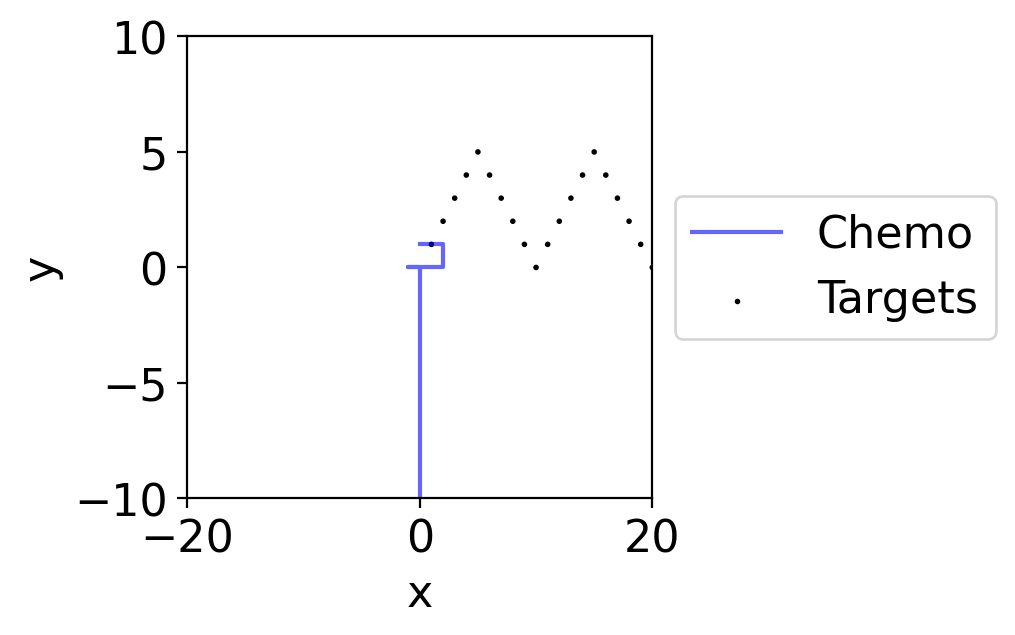

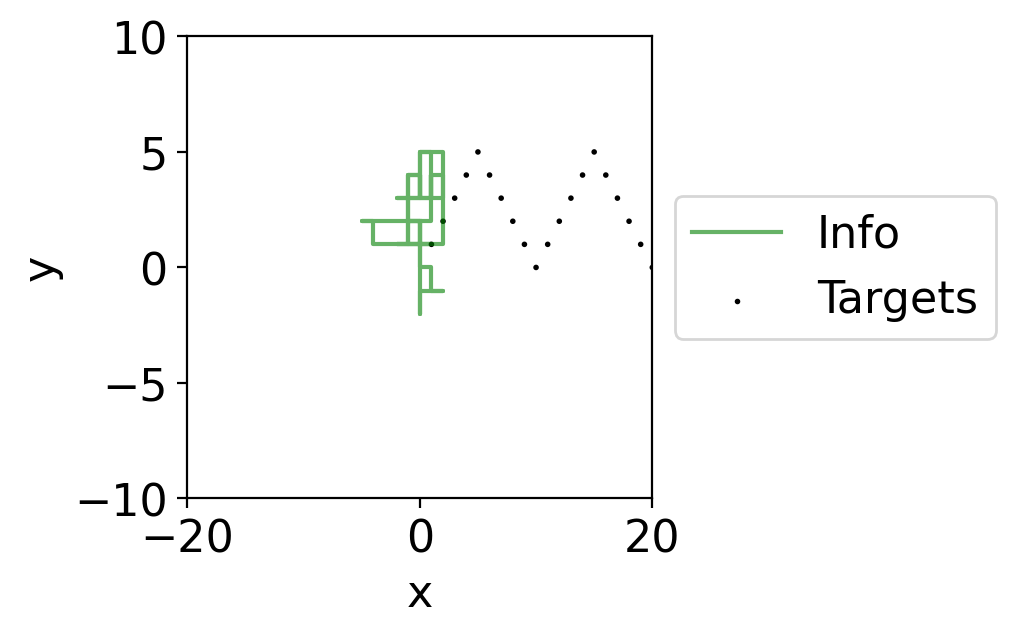

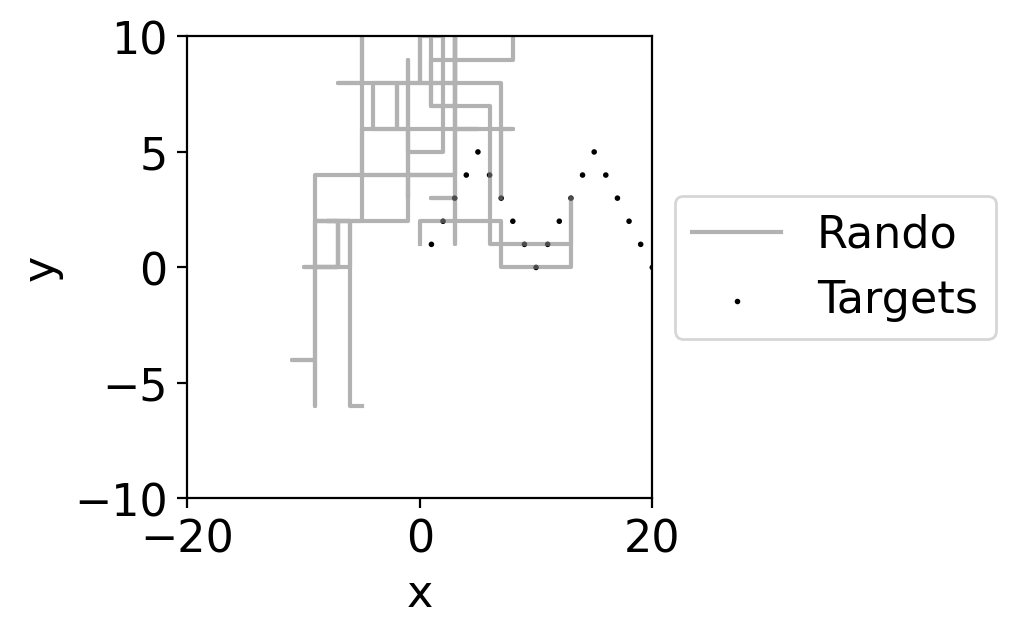

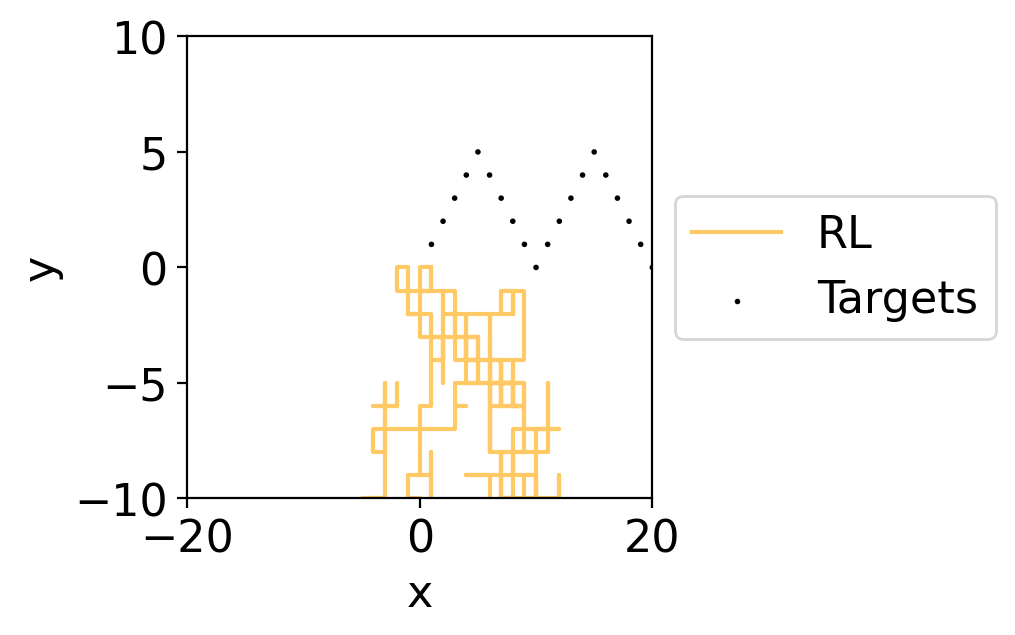

In [ ]:
plot_boundary = (20,10)
num_experiment = 0

# Results
results = [chemo_exp, info_exp, rand_exp, rl_exp]
names = ["Chemo", "Info", "Rando", "RL"]
colors = ["blue", "green", "grey", "orange"]

for name, res, color in zip(names, results, colors):
    ax = None
    ax = plot_position2d(
        select_exp(res, num_experiment),
        boundary=plot_boundary, ## plot_boundary
        label=f"{name}",
        color=color,
        alpha=0.6,
        ax=ax,
    )
    ax = plot_targets2d(
        env,
        boundary=plot_boundary,
        color="black",
        alpha=1,
        label="Targets",
        ax=ax,
    )

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

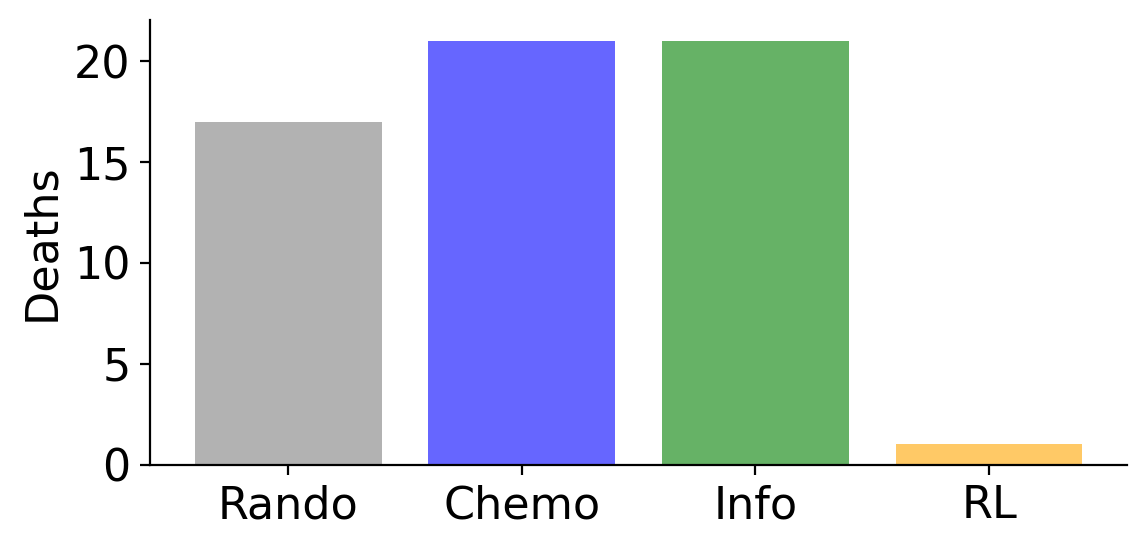

In [ ]:
# Results
results = [rand_exp, chemo_exp, info_exp,  rl_exp]
names = ["Rando", "Chemo", "Info",  "RL"]
colors = ["grey", "blue", "green", "orange"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    scores.append(num_death(res))

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(6, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Deaths")
plt.tight_layout()
sns.despine()

#Static Results
**Deaths**:
- Chemo and info have the most deaths.
- Rando has a similar amount of deaths as chemo and info.
- RL has the least number of deaths.
- Reasoning:
  - When the chemo and info agent end up outside of a target, they take longer to find the target since they require more information and use an accumulator before making any decisions thus resulting in greater deaths.
  - The rando agent moves according to brownian motion and ends up randomly landing on targets and thus accumulating less deaths than the info and chemo agents.
  - The RL agent has the least number of deaths because it learns to value each target on the grid and make immediate choices (to move up, down, left, or right) based on that value. Essentially, there is a minimal waiting period because it does not require an accumulator rather allowing it to make a decision quicker resulting in the least amount of deaths.


total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

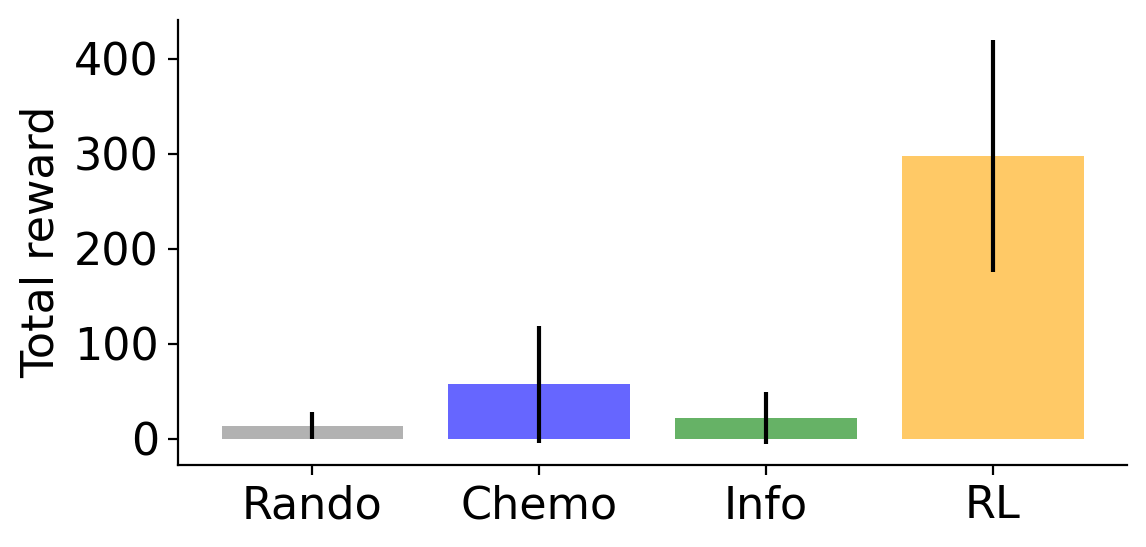

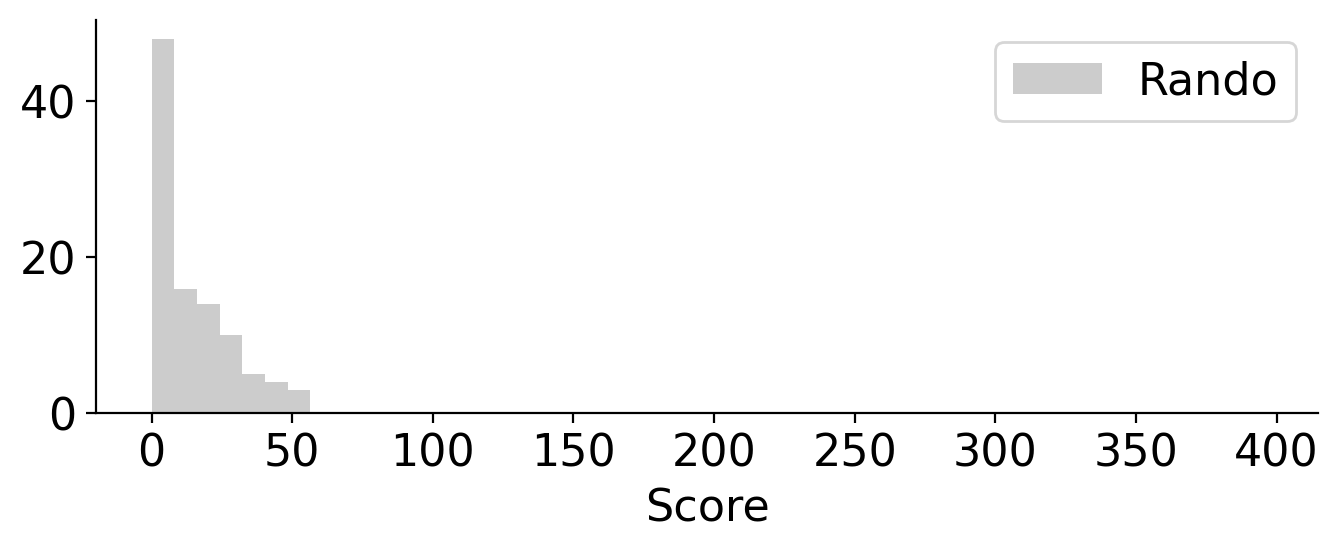

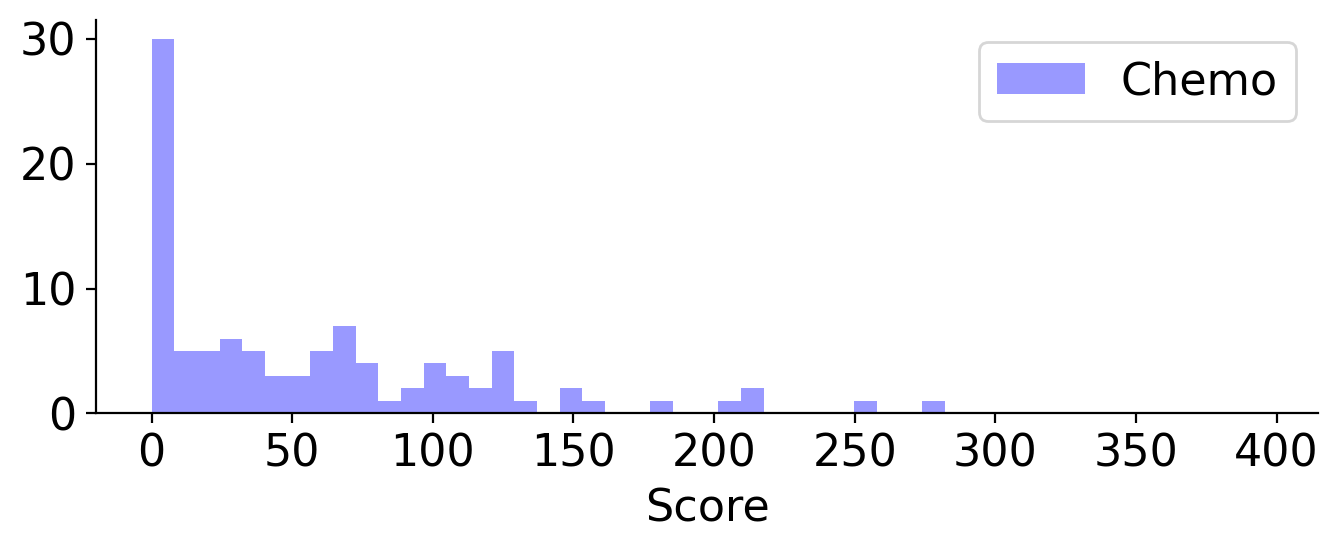

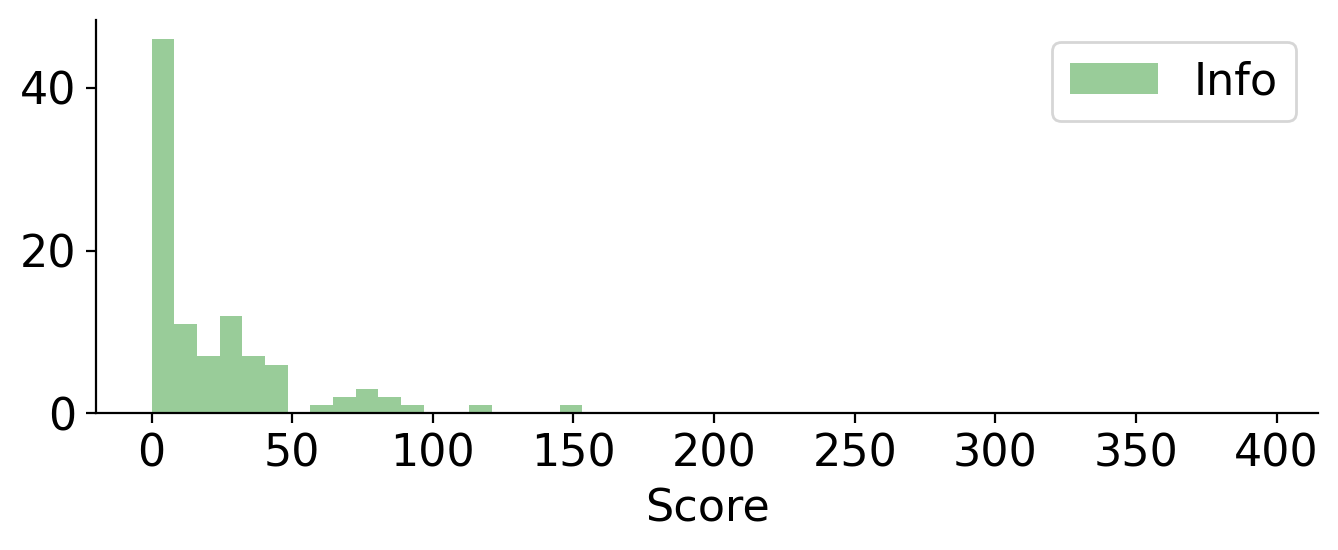

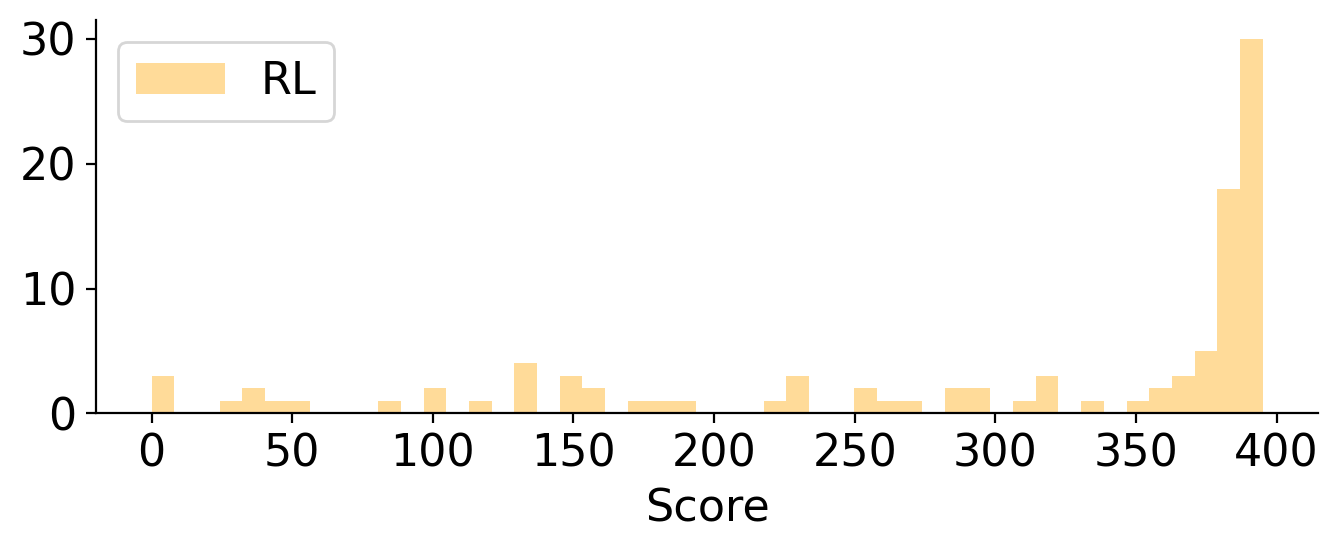

In [ ]:
# Results
results = [rand_exp, chemo_exp, info_exp,  rl_exp]
names = ["Rando", "Chemo", "Info","RL"]
colors = ["grey", "blue", "green", "orange"]

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(6, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Total reward")
plt.tight_layout()
sns.despine()

# Dists
# fig = plt.figure(figsize=(7, 5))
for (name, s, c) in zip(names, scores, colors):
    fig = plt.figure(figsize=(7, 3))
    plt.hist(s, label=name, color=c, alpha=0.4, bins=np.linspace(0, np.max(scores), 50))
    plt.legend()
    plt.xlabel("Score")
    plt.tight_layout()
    sns.despine()

**Total Reward**
- RL obtains the most total reward
- Chemo obtains the second most total reward but with high variability depending on the probability of if it obtains the scent gradient.
- Rando and info obtain the least total reward
- Reasoning:
  - RL has the most total reward because it creates a model of probabilities of rewards in its environment. In this case since the environment is stationary, the RL agent is able to utilize the model it created to obtain contiuous rewards as seen in the graphs where it follows the pattern quite nicely.
  - Rando has the least total reward because it does not move with a purpose rather randomly due to brownian motion.
  - Info has less total reward than chemo because it gets lost in the noise and entropy of the environment meanwhile chemo is simply using the scent gradient to guide its decisions.

on_off_patch_time:   0%|          | 0/100 [00:00<?, ?it/s]

on_off_patch_time:   0%|          | 0/100 [00:00<?, ?it/s]

on_off_patch_time:   0%|          | 0/100 [00:00<?, ?it/s]

on_off_patch_time:   0%|          | 0/100 [00:00<?, ?it/s]

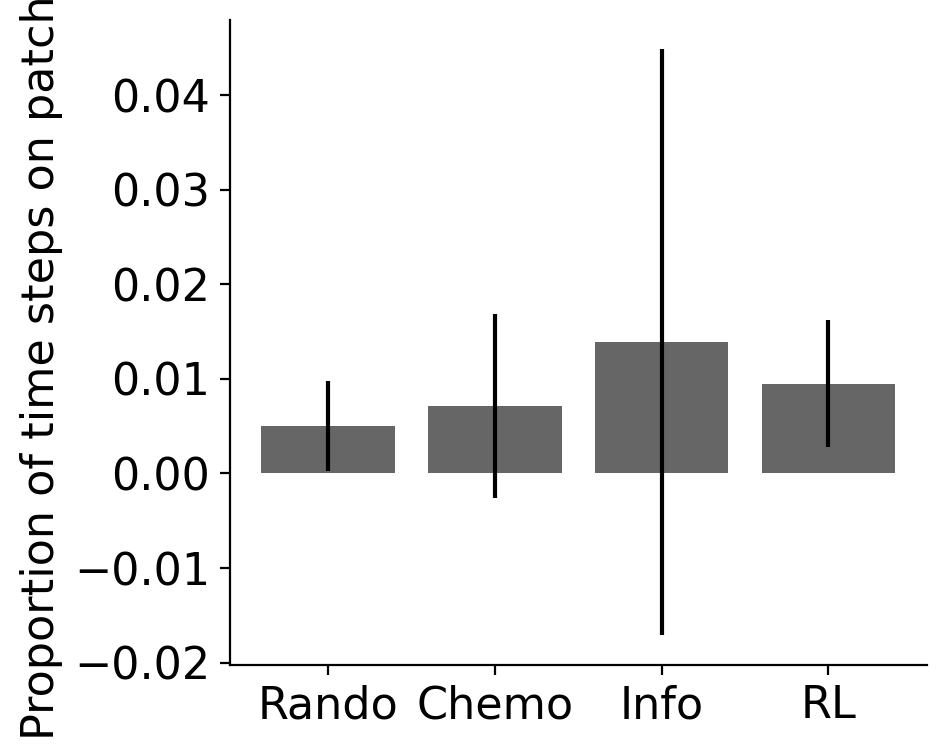

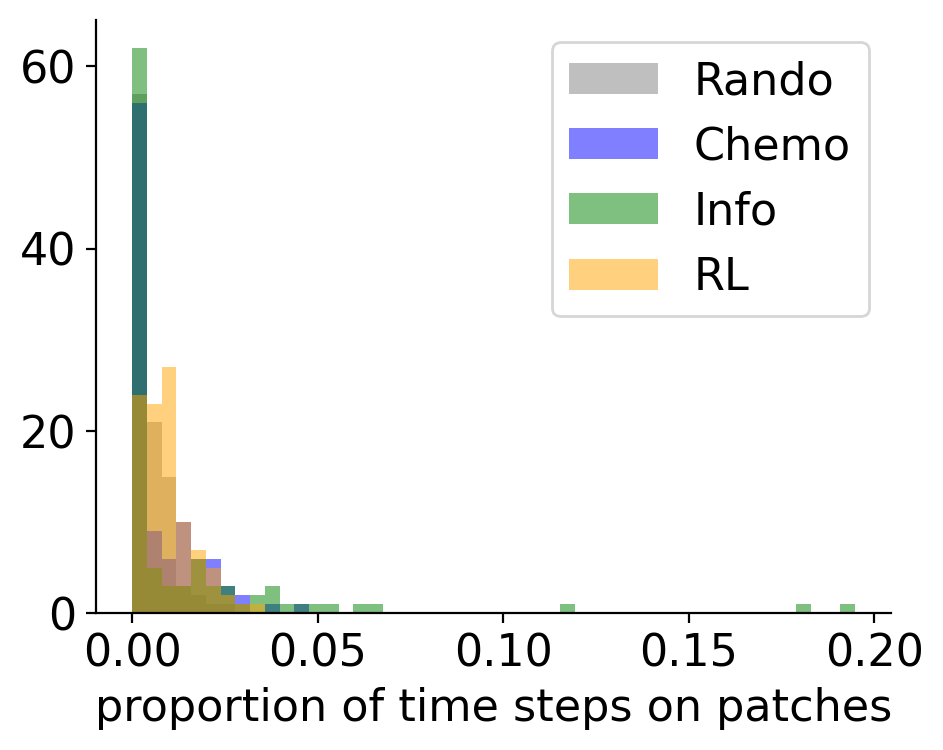

In [ ]:
# Results
results = [rand_exp, chemo_exp, info_exp,  rl_exp]
names = ["Rando", "Chemo", "Info","RL"]
colors = ["grey", "blue", "green", "orange"]

# Score by on_patch_time #eff
scores = []
for name, res, color in zip(names, results, colors):
    #scores.append(num_death(res))
    on_patch_steps, off_patch_steps = on_off_patch_time(res, num_experiments, patch_locs, radius)
    scores.append(np.divide(on_patch_steps,(np.array(on_patch_steps) + off_patch_steps)))

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 4))
plt.bar(names, m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Proportion of time steps on patches")
plt.tight_layout()
sns.despine()

# Dists
fig = plt.figure(figsize=(5, 4))
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.5, bins=np.linspace(0, np.max(scores), 50))
    plt.legend()
    plt.xlabel("proportion of time steps on patches")
    plt.tight_layout()
    sns.despine()

**Time on Patch**
- RL and info spend the most time on the patches but info has a spread out distribution.
- Chemo and rando spend roughly the same amount of time on patches.
- Reasoning:
  - RL and info spend the most time on patches because RL utilizes its model of rewards and values guiding its actions to remain on the targets. When the probability that info detects the scent along with sufficient entropy from the environment it will stay on the patch for longer time to aquire more information before deciding where to go.
  - Chemo is dependent on the probability of the scent and if it ends up near the target. In the case that it does not end up near the target, it spends a majority of its time off of the targets trying to navigate. When chemo does not detect the scent, it moves randomly resulting in spending less time on patches than info and similar to random.


# **Step 3 - Shifting Environment**

In this condition the agents are faced with an environment that undergoes a change part way through the running of the iterations. As in the bandit task, where the highest outputting arm changed at a given time step in the experiment, in this condition the location of the patch of patterned targets will change. This presents a new challenge in comparison with the previous condition. The static environment sought to see which agent was able to follow a trail most successfully. This changing path seeks to show which agent is the most flexible in changing its constuct of an environment, and learning those changes.

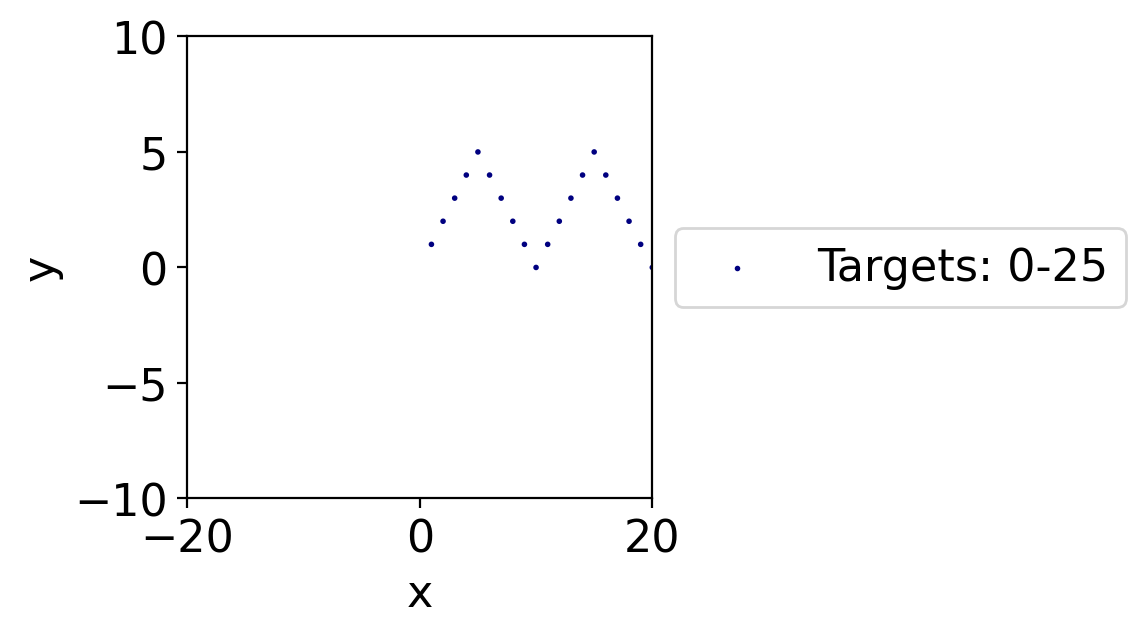

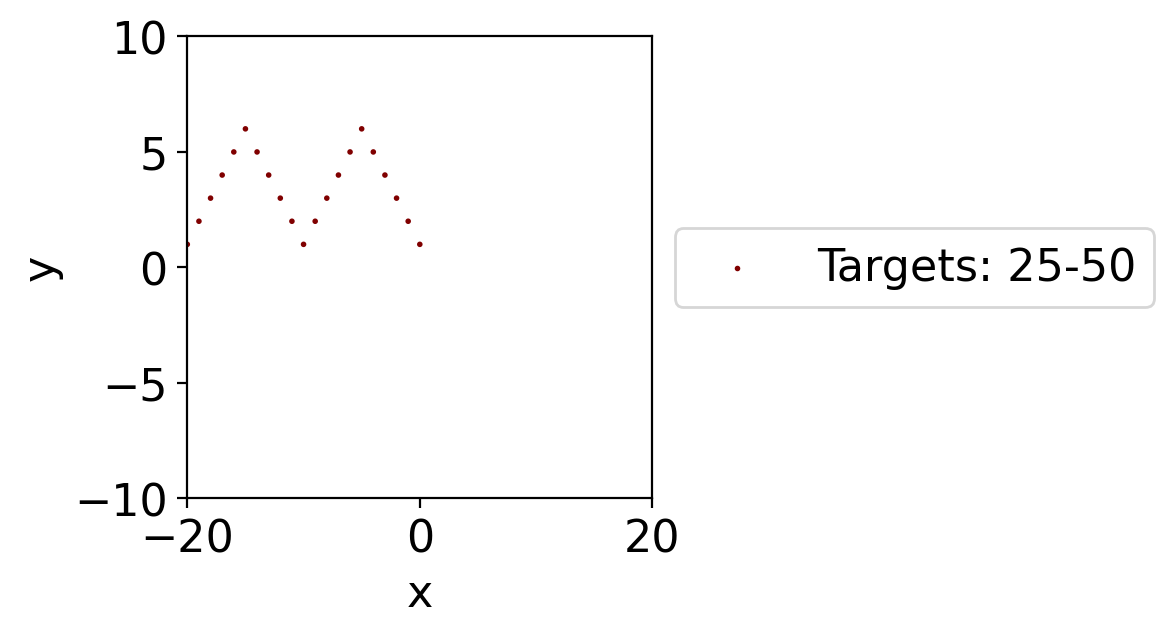

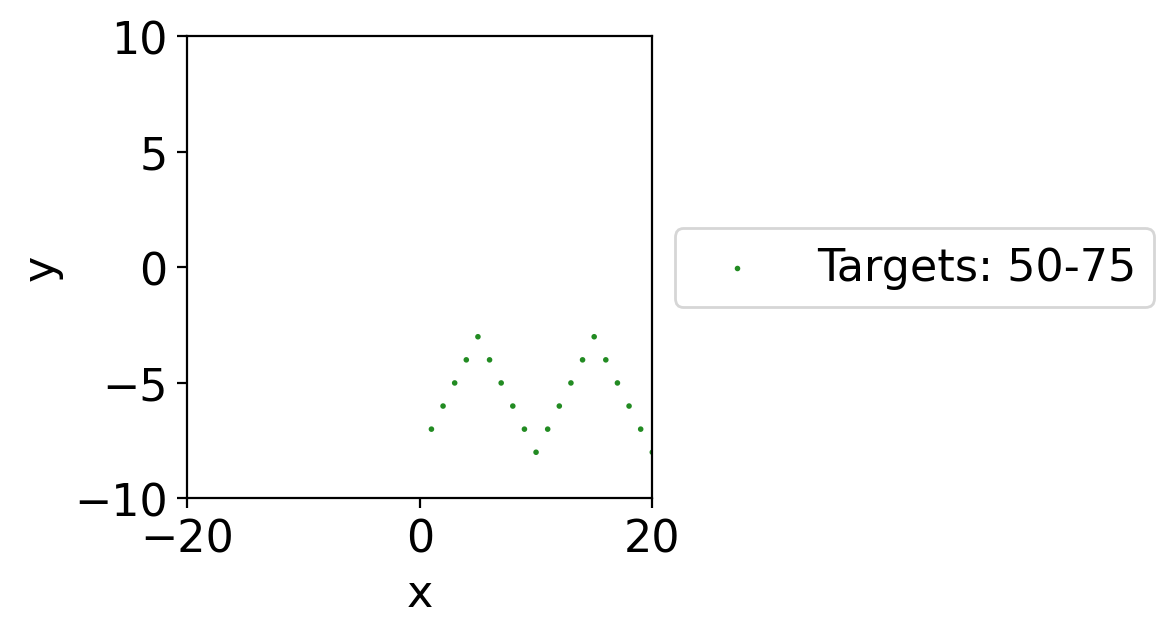

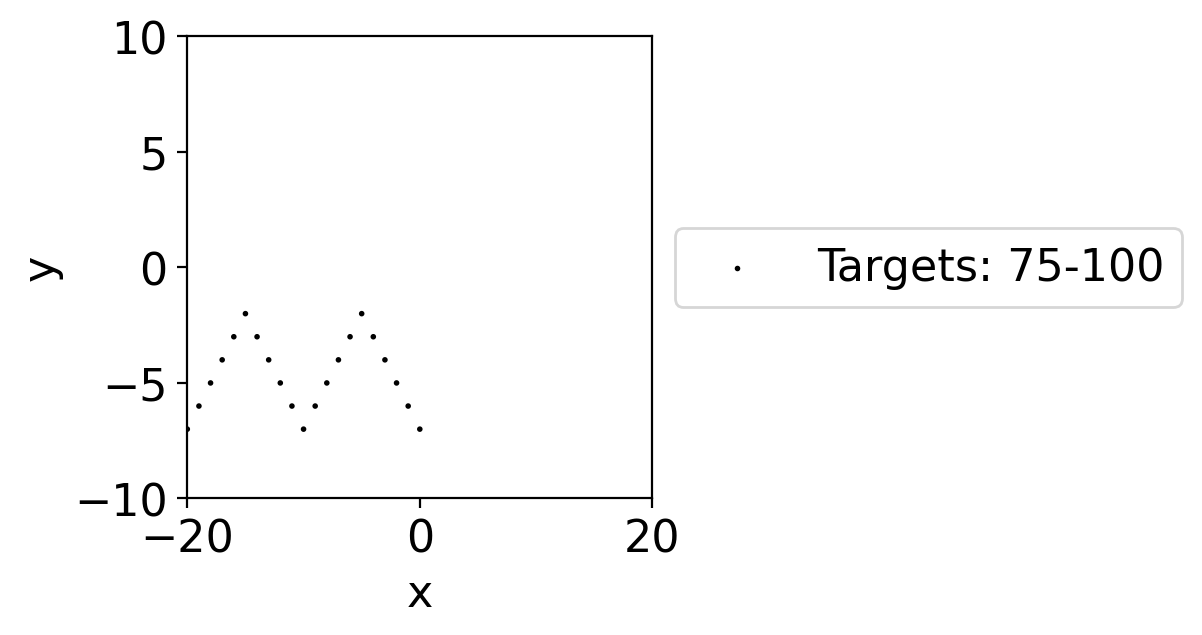

In [ ]:
# Noise and missing scents
p_scent = 0.5
noise_sigma = 1

# Shared
num_experiments = 100 #100
num_steps = 400
seed_value = 5838

# ! (leave alone)
detection_radius = 1
cog_mult = 1
max_steps = 1
min_length = 1
num_targets = 9
target_boundary = (10, 10)

# Environment parameters
detection_radius = 1
max_steps = 1
min_length = 1
n_patches = 7 #         # number of patches
n_per_patch = 10 #      # number targets per patch
radius = 2 #            # radius of each patch
target_boundary = (10, 10)

# Generate patches of targets
prng = np.random.RandomState(seed_value)
targets, patch_locs = uniform_patch_targets(n_patches, target_boundary, radius, n_per_patch, prng=prng)

firstPos = [1,1]
targets = []
targets.append(firstPos)
currPosX = firstPos[0]
currPosY = firstPos[1]
while currPosX < 5:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 5 <= currPosX < 10:
  newPosX = currPosX +1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 10 <= currPosX < 15:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 15 <= currPosX < 20:
  newPosX = currPosX + 1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)

# Scents
scents = []
for _ in range(len(targets)):
    coord, scent = create_grid_scent_patches(
        target_boundary, p=1.0, amplitude=1, sigma=2)
    scents.append(scent)

# Env
env1 = ScentGrid(mode=None)
env1.seed(seed_value)
env1.add_scents(targets, values, coord, scents, noise_sigma=noise_sigma)

#targets
firstPos = [-20,1]
targets = []
targets.append(firstPos)
currPosX = firstPos[0]
currPosY = firstPos[1]
while currPosX < -15:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while -15 <= currPosX < -10:
  newPosX = currPosX +1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while -10 <= currPosX < -5:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while -5 <= currPosX < 0:
  newPosX = currPosX + 1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)

# Scents
scents = []
for _ in range(len(targets)):
    coord, scent = create_grid_scent_patches(
        target_boundary, p=1.0, amplitude=1, sigma=2)
    scents.append(scent)

# Env
env2 = ScentGrid(mode=None)
env2.seed(seed_value)
env2.add_scents(targets, values, coord, scents, noise_sigma=noise_sigma)

firstPos = [1,-7]
targets = []
targets.append(firstPos)
currPosX = firstPos[0]
currPosY = firstPos[1]
while currPosX < 5:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 5 <= currPosX < 10:
  newPosX = currPosX +1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 10 <= currPosX < 15:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while 15 <= currPosX < 20:
  newPosX = currPosX + 1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)

# Scents
scents = []
for _ in range(len(targets)):
    coord, scent = create_grid_scent_patches(
        target_boundary, p=1.0, amplitude=1, sigma=2)
    scents.append(scent)

# Env
env3 = ScentGrid(mode=None)
env3.seed(seed_value)
env3.add_scents(targets, values, coord, scents, noise_sigma=noise_sigma)

firstPos = [-20,-7]
targets = []
targets.append(firstPos)
currPosX = firstPos[0]
currPosY = firstPos[1]
while currPosX < -15:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while -15 <= currPosX < -10:
  newPosX = currPosX +1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while -10 <= currPosX < -5:
  newPosX = currPosX + 1
  newPosY = currPosY +1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)
while -5 <= currPosX < 0:
  newPosX = currPosX + 1
  newPosY = currPosY -1
  currPosX = newPosX
  currPosY = newPosY
  newPos = [currPosX, currPosY]
  targets.append(newPos)
values = constant_values(targets, 1)

# Scents
scents = []
for _ in range(len(targets)):
    coord, scent = create_grid_scent_patches(
        target_boundary, p=1.0, amplitude=1, sigma=2)
    scents.append(scent)

# Env
env4 = ScentGrid(mode=None)
env4.seed(seed_value)
env4.add_scents(targets, values, coord, scents, noise_sigma=noise_sigma)

#plot
plot_boundary = (20, 10)
num_experiment = 0
ax = None
ax = plot_targets2d(
    env1,
    boundary=plot_boundary,
    color="navy",
    alpha=1,
    label="Targets: 0-25",
    ax=ax,
)

plot_boundary = (20, 10)
num_experiment = 0
ax = None
ax = plot_targets2d(
    env2,
    boundary=plot_boundary,
    color="maroon",
    alpha=1,
    label="Targets: 25-50",
    ax=ax,
)

plot_boundary = (20, 10)
num_experiment = 0
ax = None
ax = plot_targets2d(
    env3,
    boundary=plot_boundary,
    color="forestgreen",
    alpha=1,
    label="Targets: 50-75",
    ax=ax,
)

plot_boundary = (20, 10)
num_experiment = 0
ax = None
ax = plot_targets2d(
    env4,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets: 75-100",
    ax=ax,
)


#Agents

In [ ]:
# Experiments
for n in range(1, num_experiments):
  if n <=25:
    env = env1
  elif n <= 50:
    env = env2
  elif n <= 75:
    env = env3
  else:
    env = env4

rand_exp = experiment(
    f"rand",
    diff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

chemo_exp = experiment(
    f"chemo",
    chemo,
    env,
    num_steps=num_steps * cog_mult,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

info_exp = experiment(
    f"info",
    info,
    env,
    num_steps=num_steps * cog_mult,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

rl_exp = experiment(
    f"rl",
    rl,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)

rand:   0%|          | 0/100 [00:00<?, ?it/s]

chemo:   0%|          | 0/100 [00:00<?, ?it/s]

info:   0%|          | 0/100 [00:00<?, ?it/s]

rl:   0%|          | 0/100 [00:00<?, ?it/s]

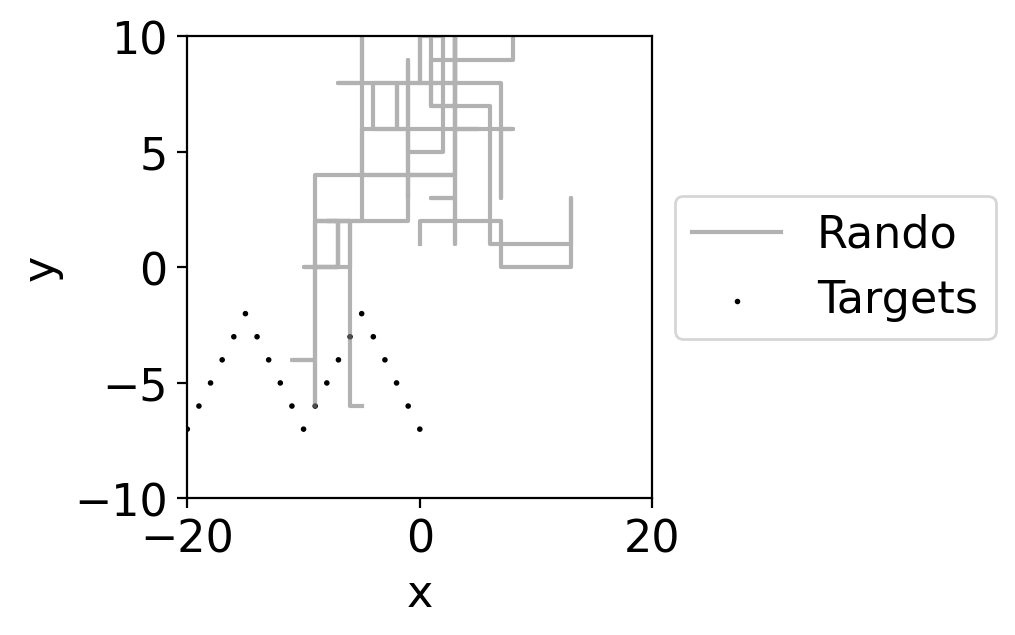

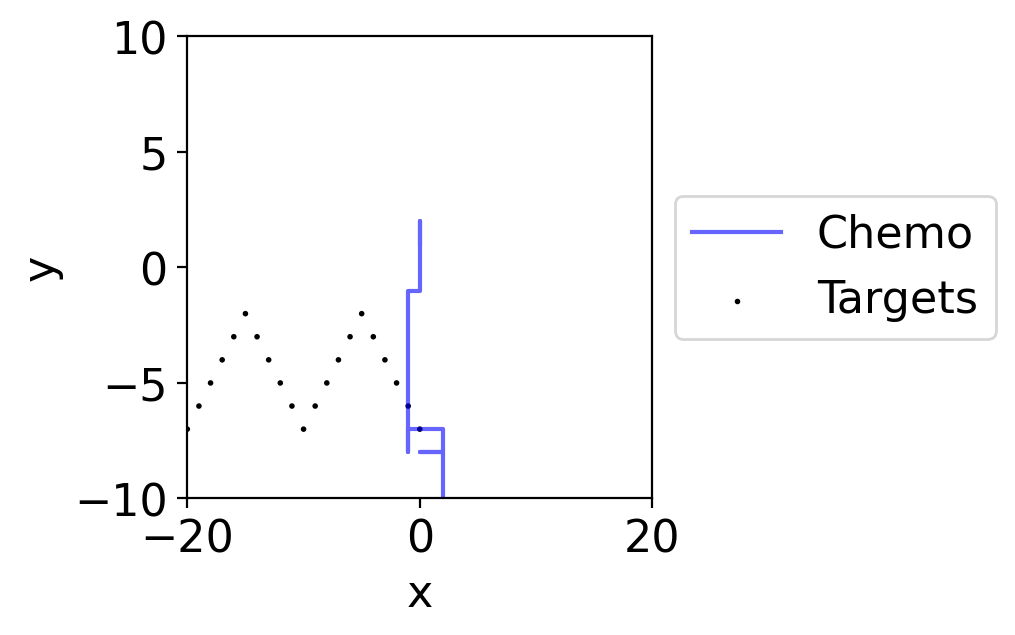

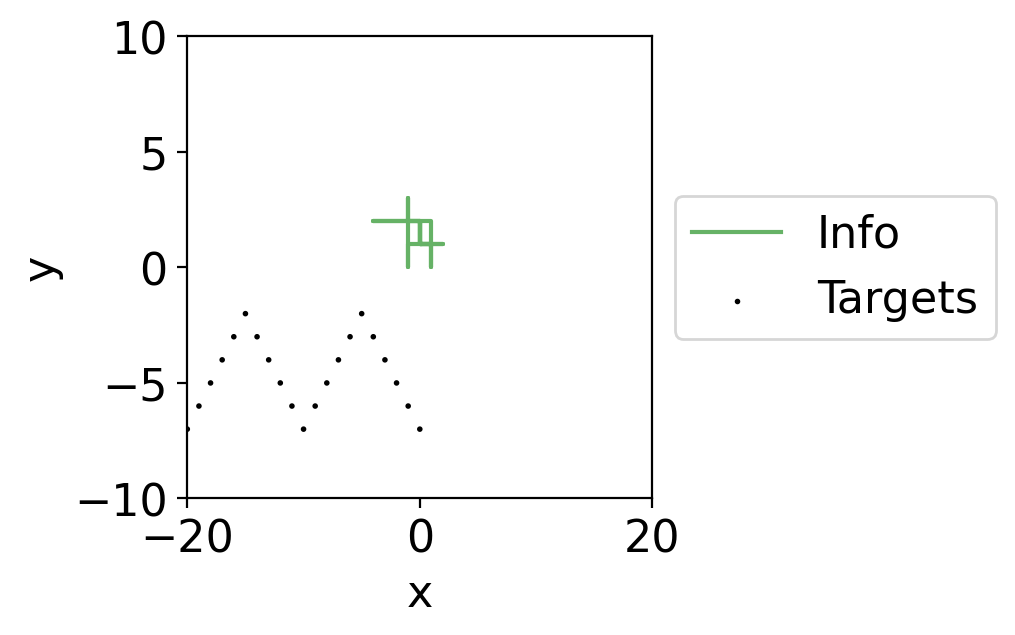

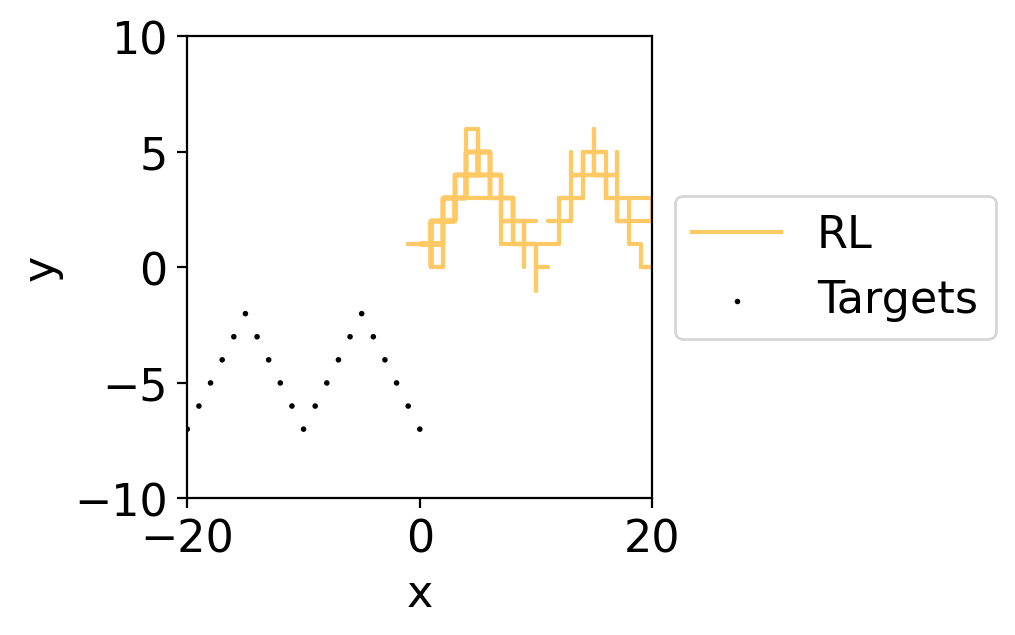

In [ ]:
plot_boundary = (20,10)
num_experiment = 0

# Results
results = [rand_exp, chemo_exp, info_exp, rl_exp]
names = ["Rando","Chemo", "Info", "RL"]
colors = ["grey","blue", "green", "orange"]

for name, res, color in zip(names, results, colors):
    ax = None
    ax = plot_position2d(
        select_exp(res, num_experiment),
        boundary=plot_boundary, ## plot_boundary
        label=f"{name}",
        color=color,
        alpha=0.6,
        ax=ax,
    )
    ax = plot_targets2d(
        env,
        boundary=plot_boundary,
        color="black",
        alpha=1,
        label="Targets",
        ax=ax,
    )

#Changing Results

**Deaths:** Number of agents that found 0 targets out of 100 iterations.

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

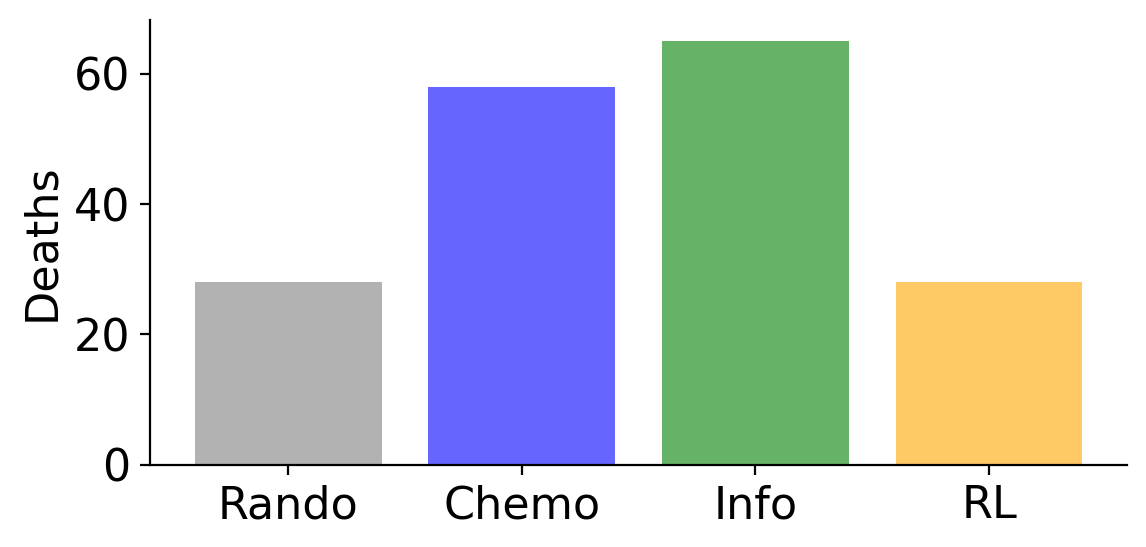

In [ ]:
# Results
results = [rand_exp, chemo_exp, info_exp,  rl_exp]
names = ["Rando", "Chemo", "Info",  "RL"]
colors = ["grey", "blue", "green", "orange"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    scores.append(num_death(res))

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(6, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Deaths")
plt.tight_layout()
sns.despine()

All agents had some level of agent death. This can likely be attributed to the sparse amount of targets in the environment.

*   The random agent performed the best with the least amount of deaths, with the reinforcement learning agent slightly behind the random.
*    The infotaxis agent performed the worst with over 60% of agents dying, with the chemotaxis agent performing slightly better.

Reasoning

The sparseness and movement of the target patch made random motion ideal for acquiring at least one target, as exploring a large portion of the grid will increase the chances that the agent finds a target. The rL agent also performs relatively well as it is a learning agent, and it can adapt quicker to changing target locations. The chemotaxis and infotaxis agents perform poorly as the agents likely do not reach a target before the patch changes location.


**Total Reward**: Number of targets acquired by the agents over 100 iterations.

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

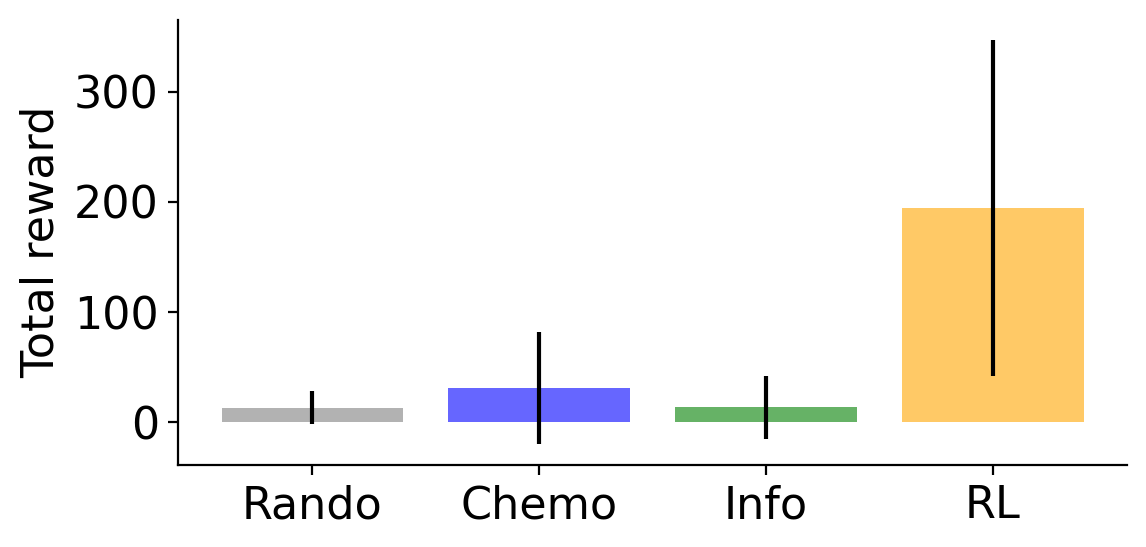

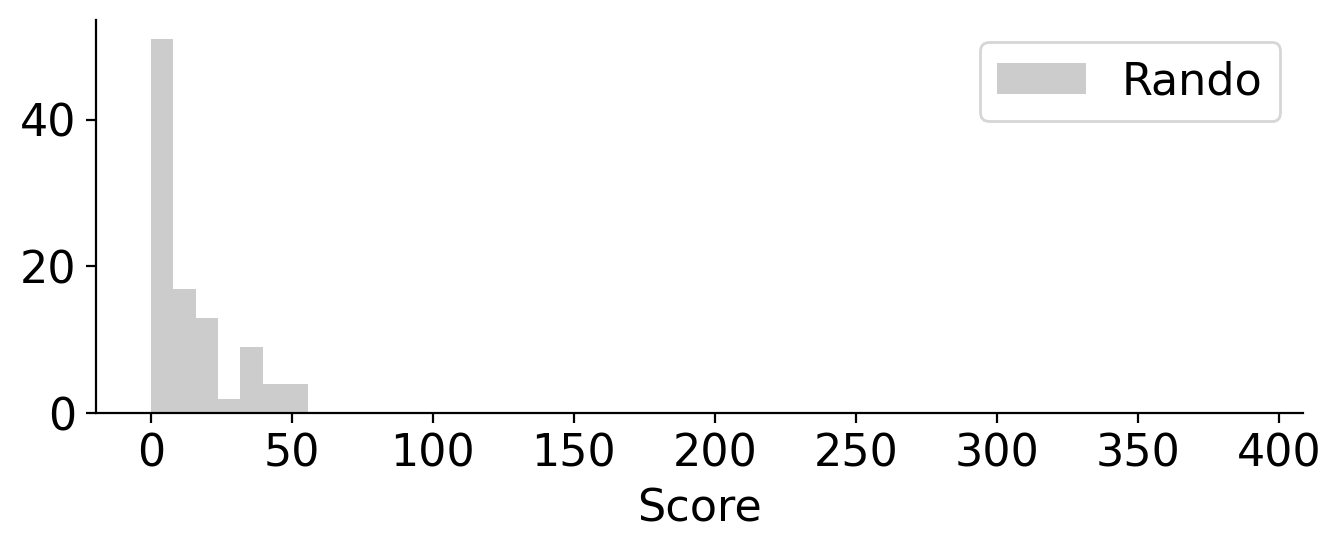

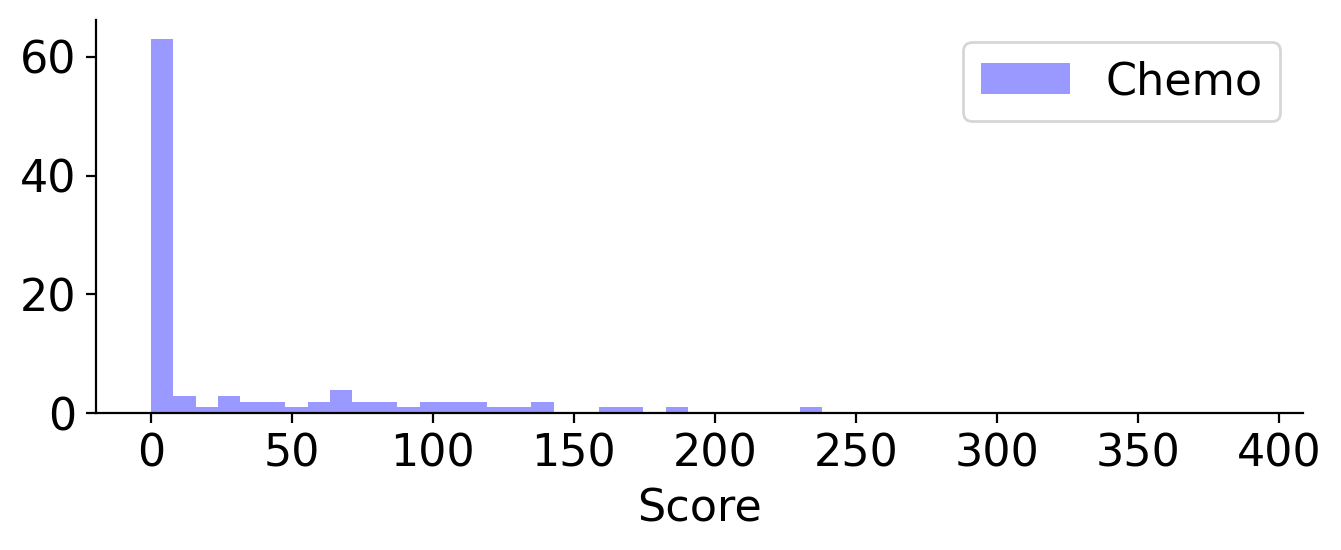

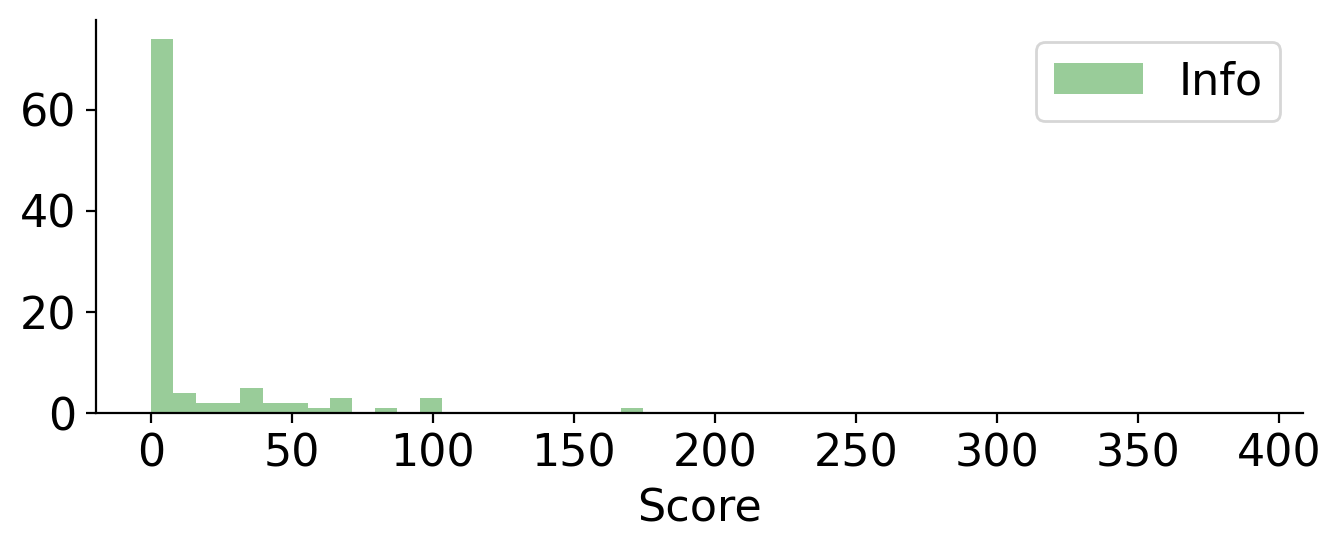

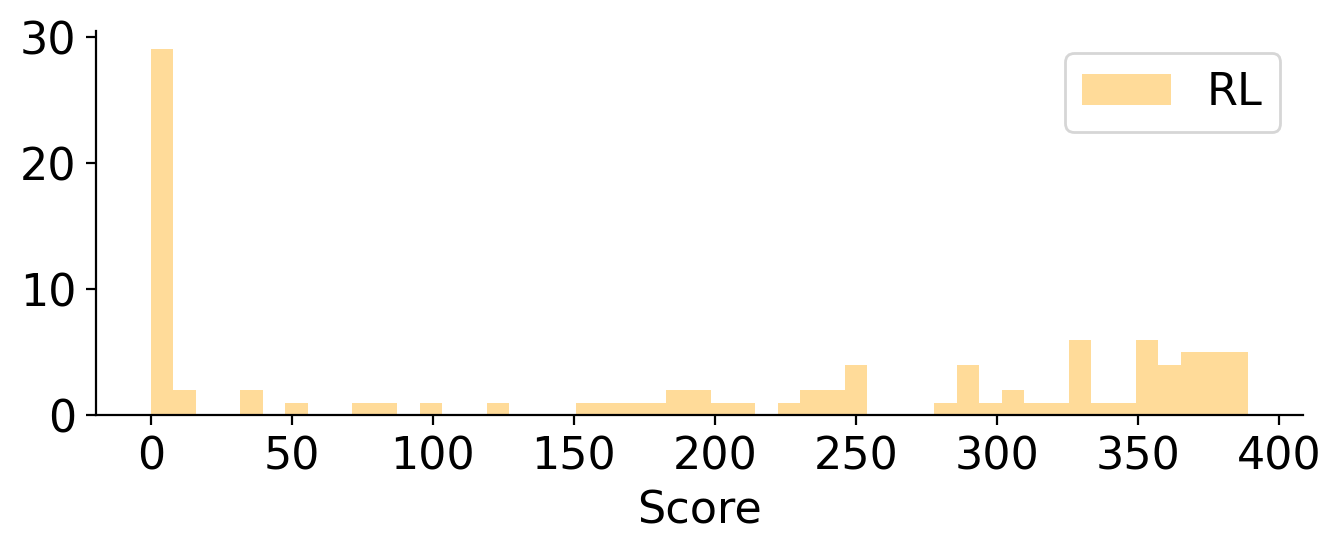

In [ ]:
# Results
results = [rand_exp, chemo_exp, info_exp,  rl_exp]
names = ["Rando", "Chemo", "Info","RL"]
colors = ["grey", "blue", "green", "orange"]

# Score
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(6, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Total reward")
plt.tight_layout()
sns.despine()

# Dists
# fig = plt.figure(figsize=(7, 5))
for (name, s, c) in zip(names, scores, colors):
    fig = plt.figure(figsize=(7, 3))
    plt.hist(s, label=name, color=c, alpha=0.4, bins=np.linspace(0, np.max(scores), 50))
    plt.legend()
    plt.xlabel("Score")
    plt.tight_layout()
    sns.despine()

Across all of the agents only the rL agent scored a high amount of total targets.

Reasoning

*   The random agent, though able to generally acquire at least one target, is not deliberately looking or searching for targets. Therefore sparseness and mutability of the patch reduce its efficiency.
*   The chemotaxis and infotaxis agents become "confused" by the shifting environment and signals, and cannot reach targets quickly enough before they move.
* The rl agent can learn from previous iterations and can use that "memory" to acquire targets. In addition, this pattern of targets is easy for the rL agent to take advantage of as it is easier to exploit. This results in the widespread performance of the rl agents, as some get no targets at all, and some perform very well.



**Time on Patch:**
The proportion of time steps that each agent spent on the target patch.

on_off_patch_time:   0%|          | 0/100 [00:00<?, ?it/s]

on_off_patch_time:   0%|          | 0/100 [00:00<?, ?it/s]

on_off_patch_time:   0%|          | 0/100 [00:00<?, ?it/s]

on_off_patch_time:   0%|          | 0/100 [00:00<?, ?it/s]

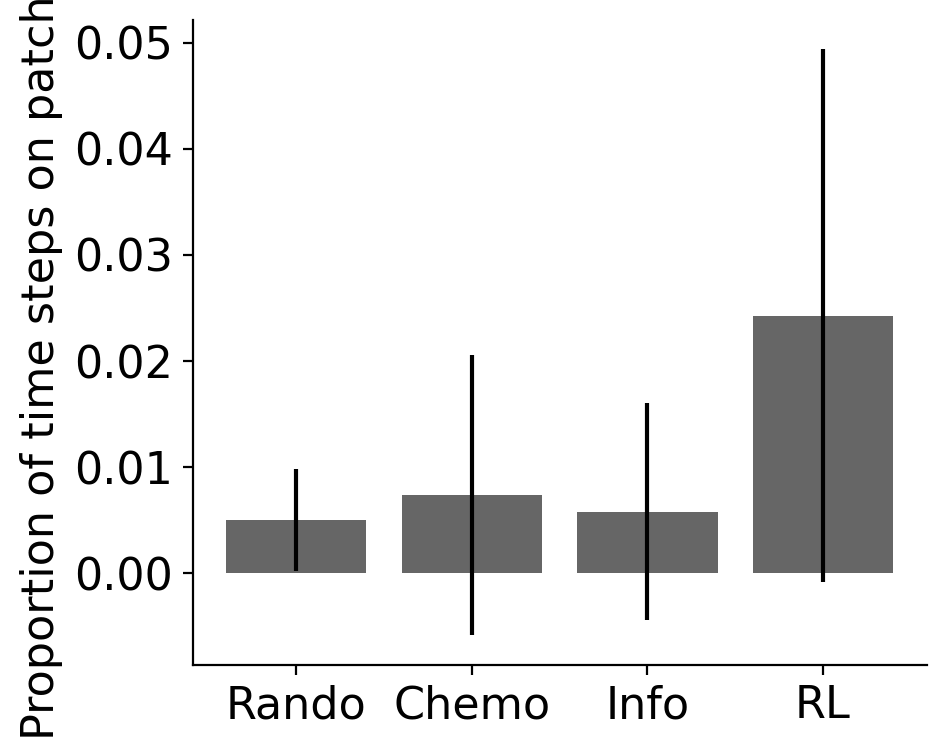

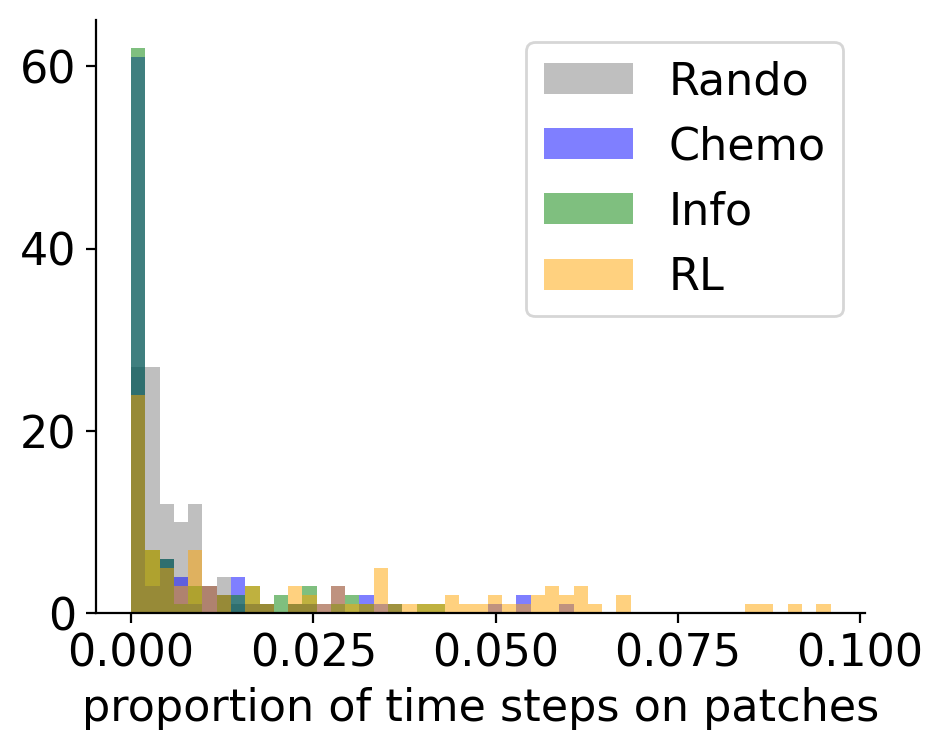

In [ ]:
# Results
results = [rand_exp, chemo_exp, info_exp,  rl_exp]
names = ["Rando", "Chemo", "Info","RL"]
colors = ["grey", "blue", "green", "orange"]

# Score by on_patch_time #eff
scores = []
for name, res, color in zip(names, results, colors):
    #scores.append(num_death(res))
    on_patch_steps, off_patch_steps = on_off_patch_time(res, num_experiments, patch_locs, radius)
    scores.append(np.divide(on_patch_steps,(np.array(on_patch_steps) + off_patch_steps)))

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(5, 4))
plt.bar(names, m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Proportion of time steps on patches")
plt.tight_layout()
sns.despine()

# Dists
fig = plt.figure(figsize=(5, 4))
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.5, bins=np.linspace(0, np.max(scores), 50))
    plt.legend()
    plt.xlabel("proportion of time steps on patches")
    plt.tight_layout()
    sns.despine()

The rl agent spent the most time on patch, or on the target cluster.

Reasoning


*   The rl agent has the most ability to exploit a patch once it locates it. Also, it can learn over iteration where the targets move, further increasing its on-patch time.
*   The chemo agent can stay on the patch if it finds it, but once it moves it is unlikely to reach it again.
* The info agent performs similayly to the chemo agent, but it likely does not find the patches as quickly.
* The random agent moves all around the grid, giving it a low on-patch time.



Visualize Agents over Time: Look at agents' paths at different timepoints.

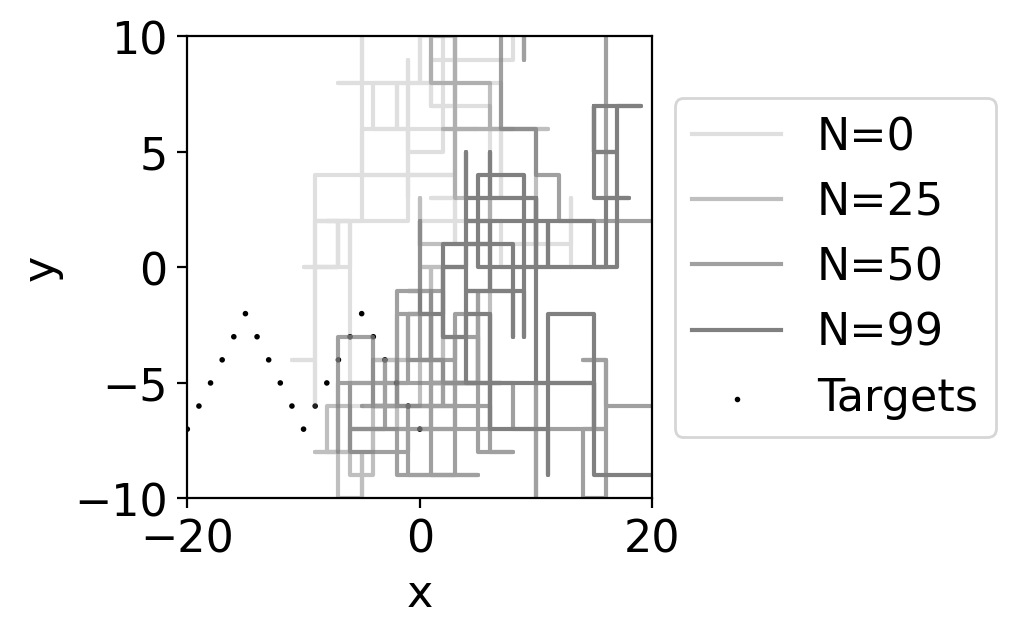

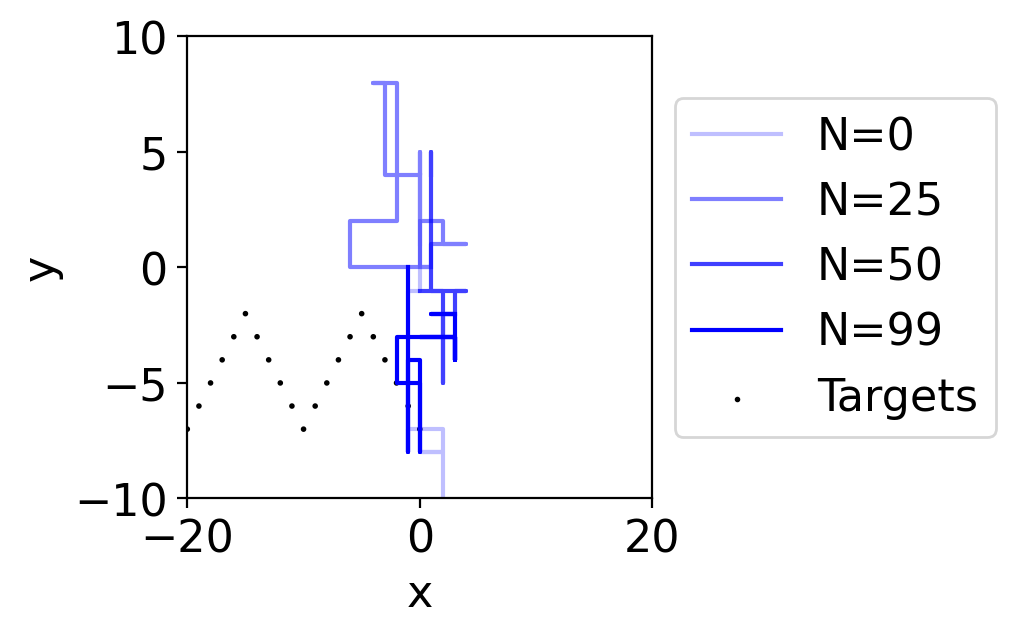

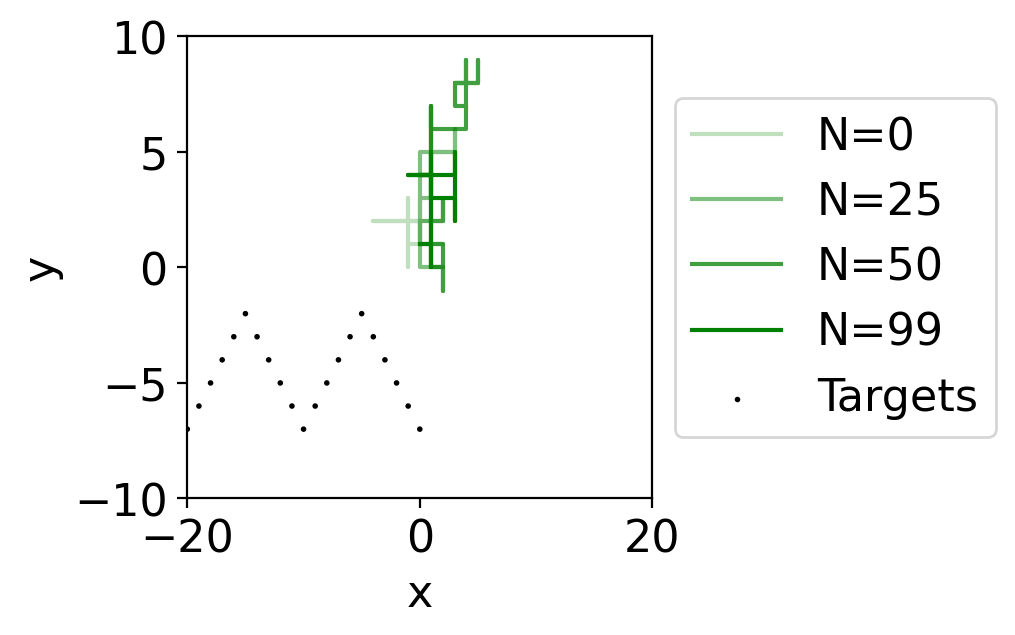

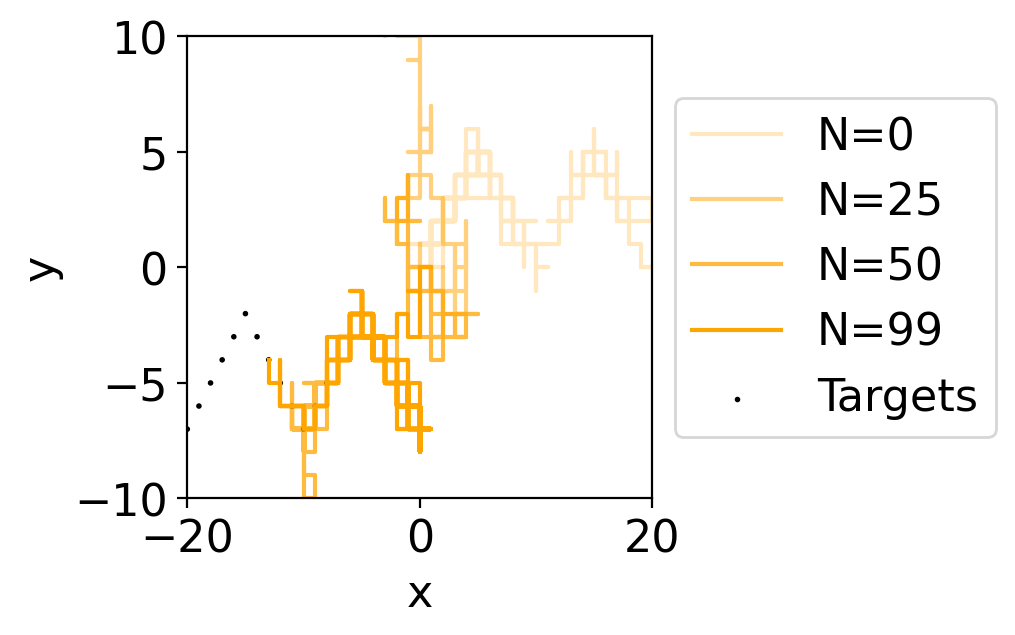

In [ ]:
plot_boundary = (20, 10)

# -
num_experiment = 0
ax = None
ax = plot_position2d(
    select_exp(rand_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="grey",
    alpha=0.25,
    ax=ax,
)
num_experiment = 25
ax = plot_position2d(
    select_exp(rand_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="grey",
    alpha=0.5,
    ax=ax,
)
num_experiment = 50
ax = plot_position2d(
    select_exp(rand_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="grey",
    alpha=0.75,
    ax=ax,
)
num_experiment = 99
ax = plot_position2d(
    select_exp(rand_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="grey",
    alpha=1,
    ax=ax,
)
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

plot_boundary = (20, 10)

# -
num_experiment = 0
ax = None
ax = plot_position2d(
    select_exp(chemo_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="blue",
    alpha=0.25,
    ax=ax,
)
num_experiment = 25
ax = plot_position2d(
    select_exp(chemo_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="blue",
    alpha=0.5,
    ax=ax,
)
num_experiment = 50
ax = plot_position2d(
    select_exp(chemo_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="blue",
    alpha=0.75,
    ax=ax,
)
num_experiment = 99
ax = plot_position2d(
    select_exp(chemo_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="blue",
    alpha=1,
    ax=ax,
)
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

plot_boundary = (20, 10)

# -
num_experiment = 0
ax = None
ax = plot_position2d(
    select_exp(info_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="green",
    alpha=0.25,
    ax=ax,
)
num_experiment = 25
ax = plot_position2d(
    select_exp(info_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="green",
    alpha=0.5,
    ax=ax,
)
num_experiment = 50
ax = plot_position2d(
    select_exp(info_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="green",
    alpha=0.75,
    ax=ax,
)
num_experiment = 99
ax = plot_position2d(
    select_exp(info_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="green",
    alpha=1,
    ax=ax,
)
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

plot_boundary = (20, 10)

# -
num_experiment = 0
ax = None
ax = plot_position2d(
    select_exp(rl_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="orange",
    alpha=0.25,
    ax=ax,
)
num_experiment = 25
ax = plot_position2d(
    select_exp(rl_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="orange",
    alpha=0.5,
    ax=ax,
)
num_experiment = 50
ax = plot_position2d(
    select_exp(rl_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="orange",
    alpha=0.75,
    ax=ax,
)
num_experiment = 99
ax = plot_position2d(
    select_exp(rl_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="orange",
    alpha=1,
    ax=ax,
)
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

Analysis

The graph above show the pattern of movement for each agent across different itterations. The first iteration is an example where environment 1 is used and is the lightest path. The movement lines get darker as you go through iterations with environments 2, 3, and 4 (ie the target patch moving throughout the grid).


The graphs of agent movement show the expected random movement of the random agent all over the grid. The chemotaxis agent displays a bit more movement, the infotaxis is fairly contained to the center, and the rl agent shows exploitation od the target patches as they move around the grid at different time steps.

rl:   0%|          | 0/500 [00:00<?, ?it/s]

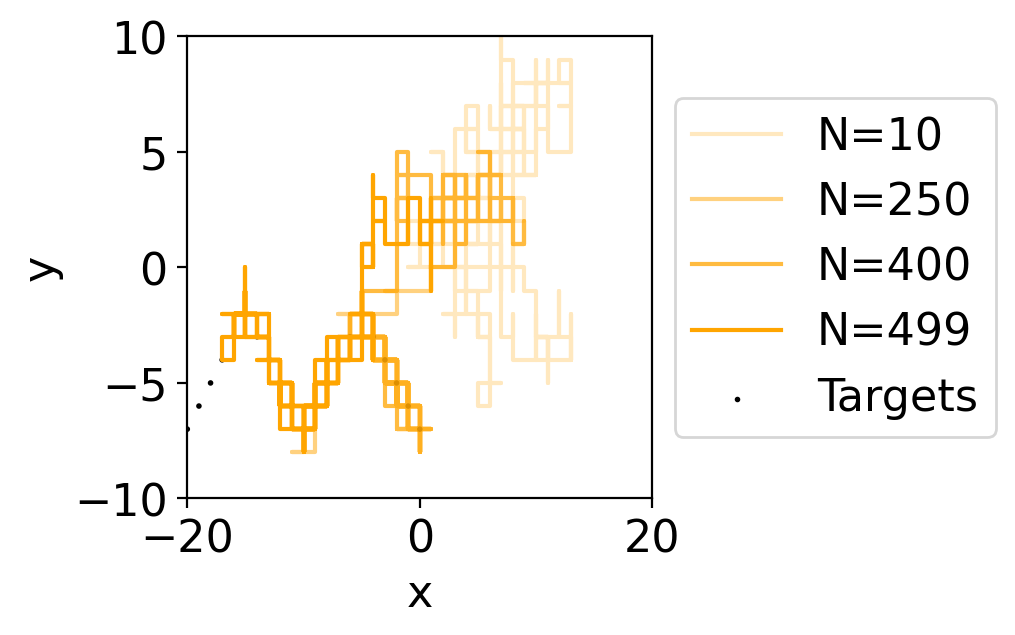

In [ ]:
num_experiments = 500

rl_exp = experiment(
    f"rl",
    rl,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=seed_value
)
plot_boundary = (20, 10)

# -
num_experiment = 10
ax = None
ax = plot_position2d(
    select_exp(rl_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="orange",
    alpha=0.25,
    ax=ax,
)
num_experiment = 250
ax = plot_position2d(
    select_exp(rl_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="orange",
    alpha=0.5,
    ax=ax,
)
num_experiment = 400
ax = plot_position2d(
    select_exp(rl_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="orange",
    alpha=0.75,
    ax=ax,
)
num_experiment = 499
ax = plot_position2d(
    select_exp(rl_exp, num_experiment),
    boundary=plot_boundary,
    label=f"N={num_experiment}",
    color="orange",
    alpha=1,
    ax=ax,
)
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

total_reward:   0%|          | 0/500 [00:00<?, ?it/s]

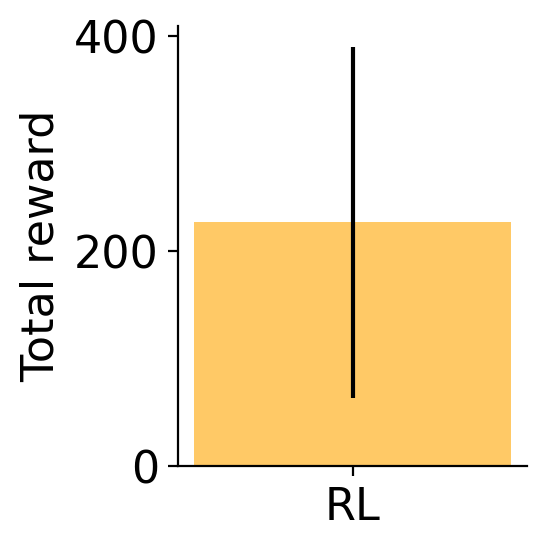

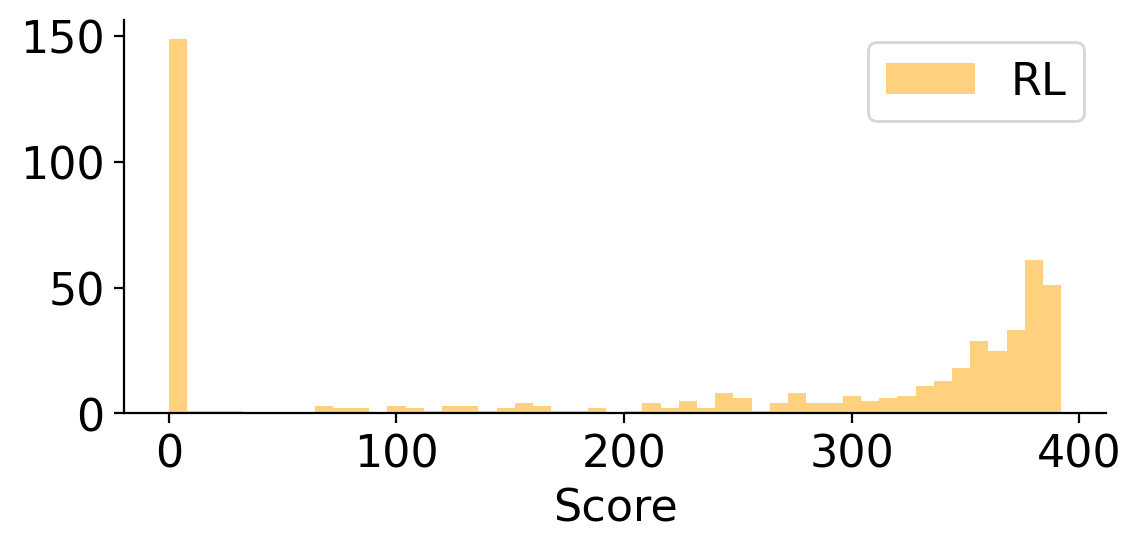

In [ ]:
# Results
results = [ rl_exp]
names = [ "RL"]
colors = [ "orange"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    r = total_reward(res)
    scores.append(r)

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color=colors, alpha=0.6)
plt.ylabel("Total reward")
plt.tight_layout()
sns.despine()

# Dists
fig = plt.figure(figsize=(6, 3))
plt.hist(s, label=name, color=c, alpha=0.5, bins=np.linspace(0, np.max(scores), 50))
plt.legend()
plt.xlabel("Score")
plt.tight_layout()
sns.despine()

#Conclusions and Future Considerations

**Conclusion**
> Consistent with our hypothesis, the RL agent performed the best in all environments, having the highest total reward and the fewest deaths. This is because it is a learning-exploitative agent, so it is able to well in small, compact environments, especially those that have patterns that it can follow.

> Also consistent with our hypothesis, the rando agent had fewer deaths than the chemo and info agents, however it also had lower totwal reward. This is because the random movement of the agent in the small space makes it very likely that it will hit at least one target, so it can survive, but not likely to hit a lot of targets.

> One surprising result was thet while the info agent outperformed the chemo agent in the static environment, it performed much worse in the shifting environment. This is likely because in the shifting environment, the info agent did not have enough time to get to the target patch before it moved, whereas the chemo agent could find the patch more quickly.


**Future Considerations**

> Our environments are relatively small and densely populated with targets, which makes it easier for agents to find targets to begin with. It would be worthwhile to investigate how decreasing this target density would impact the performance of the agents -- partucluarly the random agent, as its success is dependent on the probability of randomly encountering a target, rather than actively searching for them.

> Additionally, our simulation does not account for the cost of movement, which, in the real world, is an important consideration. Many of our agents spent a lot of time wandering around the grid before encountering any targets, which does not accurately reflect real life. The optimal foraging strategy would be one that maximizes reward AND minimizes the expenditure of energy and time, so future experiments should incorporate this into their simulations.

# **Take Home Message**

The best foraging strategy across multiple environments is reinforcement learning. Looking back at our grocery store example, this makes sense. Regardless of the store, every grocery store is laid out in a pattern that we can all recognize. Even if the store layout changes, as we have all experienced and as we have shown in the shifting environments, the general pattern is still true: eggs will always be found near the milk and not in the snack aisle. In the end, the ability to learn from past experiences and recognize patterns is what allows complex organisms to forage so successfully.

**References**

[1] “Foraging behavior,” Foraging Behavior - an overview | ScienceDirect Topics, https://www.sciencedirect.com/topics/earth-and-planetary-sciences/foraging-behavior (accessed Dec. 6, 2023).

[2] Y. Nagano and T. Yokoi, “Honeybees with extensive foraging experience rob nectar more frequently,” The Science of Nature, vol. 109, no. 1, 2021. doi:10.1007/s00114-021-01781-7

[3] A. G. Hertel et al., “Temporal effects of hunting on foraging behavior of an apex predator: Do bears forego foraging when risk is high?,” Oecologia, vol. 182, no. 4, pp. 1019–1029, 2016. doi:10.1007/s00442-016-3729-8

[4] “Hunter-gatherer culture,” Education, https://education.nationalgeographic.org/resource/hunter-gatherer-culture/ (accessed Dec. 6, 2023).

